# PRETEST

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import scipy.stats as stats

In [2]:
# Define path
os.chdir("/Users/m.avdejev/Desktop/HVA_DDB/Thesis/Survey/Pretest")

In [3]:
# Read the csv file
data = pd.read_csv("Survey_results_v2.csv")

In [4]:
# Drop repeated row
# Drop rows by index
data = data.drop([0, 1])

# Print the first rows 
data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Group 31_2,Group 31_3,Group 31_4,Group 31_5,Group 32_1,Group 32_2,Group 32_3,Group 32_4,Group 32_5,FL_47_DO
2,2024-04-23 18:12:54,2024-04-23 18:15:33,0,89.205.132.175,100,158,1,2024-04-23 18:15:34,R_1HLSmBsAYXbQoyR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block1|Block25|Block20|Block13
3,2024-04-23 18:12:16,2024-04-23 18:16:09,0,104.28.30.78,100,232,1,2024-04-23 18:16:09,R_5DBYCsskKLa9N1Z,NaN,...,NaN,NaN,NaN,NaN,5,3,5,5,4,Block17|Block10|Block32|Block15
4,2024-04-23 18:18:28,2024-04-23 18:19:46,0,77.161.177.217,100,77,1,2024-04-23 18:19:47,R_8pPoqVLTYqhR3J0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block22|Block2|Block15|Block9
5,2024-04-23 18:16:40,2024-04-23 18:19:55,0,31.20.248.101,100,194,1,2024-04-23 18:19:55,R_2NIj1dd7hdMZIgc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block28|Block6|Block24|Block23
6,2024-04-23 18:18:03,2024-04-23 18:20:18,0,84.241.195.205,100,134,1,2024-04-23 18:20:19,R_2mecQUirnpJwGg9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block25|Block3|Block8|Block10


The dataset consists of 5 rows × 178 columns
- The first columns represent information regarding participation in the survey, such as StartDate	EndDate IPAddress	Progress RecordedDate etc., as well as ResponseId column which represents unique response ID for each respondent
- The following "Group" columns represent the Likert Scale responses 

Next step: Create a new DF for further analysis of the survey results

In [5]:
# Create a new df with dummy columns to give characheteristics to emails and transfer given Likert answers for further analysis
dataF = pd.DataFrame(columns=['RespID', 'Resp', 'Q1_Profit', 'Q2_Transparency', 'Q3_Anthropomorphism', 'Q4_Promotional', 'Q5_Formal', 'C_Profit', 'C_Transparency', 'C_Anthropomorphism', 'C_Promotional', 'C_Formal'])

print(dataF)

data = pd.DataFrame(data)

rows_to_concat = []

for index, row in data.iterrows():
    counter = 0

    if pd.notnull(row['Group 1_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 1_1'], 'Q2_Transparency': row['Group 1_2'], 'Q3_Anthropomorphism': row['Group 1_3'], 'Q4_Promotional': row['Group 1_4'], 'Q5_Formal':row['Group 1_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 2_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 2_1'], 'Q2_Transparency': row['Group 2_2'], 'Q3_Anthropomorphism': row['Group 2_3'], 'Q4_Promotional': row['Group 2_4'], 'Q5_Formal':row['Group 2_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 3_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 3_1'], 'Q2_Transparency': row['Group 3_2'], 'Q3_Anthropomorphism': row['Group 3_3'], 'Q4_Promotional': row['Group 3_4'], 'Q5_Formal':row['Group 3_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 4_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 4_1'], 'Q2_Transparency': row['Group 4_2'], 'Q3_Anthropomorphism': row['Group 4_3'], 'Q4_Promotional': row['Group 4_4'], 'Q5_Formal':row['Group 4_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 5_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 5_1'], 'Q2_Transparency': row['Group 5_2'], 'Q3_Anthropomorphism': row['Group 5_3'], 'Q4_Promotional': row['Group 5_4'], 'Q5_Formal':row['Group 5_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 6_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 6_1'], 'Q2_Transparency': row['Group 6_2'], 'Q3_Anthropomorphism': row['Group 6_3'], 'Q4_Promotional': row['Group 6_4'], 'Q5_Formal':row['Group 6_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 7_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 7_1'], 'Q2_Transparency': row['Group 7_2'], 'Q3_Anthropomorphism': row['Group 7_3'], 'Q4_Promotional': row['Group 7_4'], 'Q5_Formal':row['Group 7_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 8_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 8_1'], 'Q2_Transparency': row['Group 8_2'], 'Q3_Anthropomorphism': row['Group 8_3'], 'Q4_Promotional': row['Group 8_4'], 'Q5_Formal':row['Group 8_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 9_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 9_1'], 'Q2_Transparency': row['Group 9_2'], 'Q3_Anthropomorphism': row['Group 9_3'], 'Q4_Promotional': row['Group 9_4'], 'Q5_Formal':row['Group 9_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 10_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 10_1'], 'Q2_Transparency': row['Group 10_2'], 'Q3_Anthropomorphism': row['Group 10_3'], 'Q4_Promotional': row['Group 10_4'], 'Q5_Formal':row['Group 10_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 11_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 11_1'], 'Q2_Transparency': row['Group 11_2'], 'Q3_Anthropomorphism': row['Group 11_3'], 'Q4_Promotional': row['Group 11_4'], 'Q5_Formal':row['Group 11_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 12_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 12_1'], 'Q2_Transparency': row['Group 12_2'], 'Q3_Anthropomorphism': row['Group 12_3'], 'Q4_Promotional': row['Group 12_4'], 'Q5_Formal':row['Group 12_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 13_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 13_1'], 'Q2_Transparency': row['Group 13_2'], 'Q3_Anthropomorphism': row['Group 13_3'], 'Q4_Promotional': row['Group 13_4'], 'Q5_Formal':row['Group 13_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 14_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 14_1'], 'Q2_Transparency': row['Group 14_2'], 'Q3_Anthropomorphism': row['Group 14_3'], 'Q4_Promotional': row['Group 14_4'], 'Q5_Formal':row['Group 14_5'], 'C_Profit':1, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 15_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 15_1'], 'Q2_Transparency': row['Group 15_2'], 'Q3_Anthropomorphism': row['Group 15_3'], 'Q4_Promotional': row['Group 15_4'], 'Q5_Formal':row['Group 15_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 16_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 16_1'], 'Q2_Transparency': row['Group 16_2'], 'Q3_Anthropomorphism': row['Group 16_3'], 'Q4_Promotional': row['Group 16_4'], 'Q5_Formal':row['Group 16_5'], 'C_Profit':1, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 17_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 17_1'], 'Q2_Transparency': row['Group 17_2'], 'Q3_Anthropomorphism': row['Group 17_3'], 'Q4_Promotional': row['Group 17_4'], 'Q5_Formal':row['Group 17_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 18_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 18_1'], 'Q2_Transparency': row['Group 18_2'], 'Q3_Anthropomorphism': row['Group 18_3'], 'Q4_Promotional': row['Group 18_4'], 'Q5_Formal':row['Group 18_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 19_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 19_1'], 'Q2_Transparency': row['Group 19_2'], 'Q3_Anthropomorphism': row['Group 19_3'], 'Q4_Promotional': row['Group 19_4'], 'Q5_Formal':row['Group 19_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 20_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 20_1'], 'Q2_Transparency': row['Group 20_2'], 'Q3_Anthropomorphism': row['Group 20_3'], 'Q4_Promotional': row['Group 20_4'], 'Q5_Formal':row['Group 20_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 21_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 21_1'], 'Q2_Transparency': row['Group 21_2'], 'Q3_Anthropomorphism': row['Group 21_3'], 'Q4_Promotional': row['Group 21_4'], 'Q5_Formal':row['Group 21_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 22_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 22_1'], 'Q2_Transparency': row['Group 22_2'], 'Q3_Anthropomorphism': row['Group 22_3'], 'Q4_Promotional': row['Group 22_4'], 'Q5_Formal':row['Group 22_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 23_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 23_1'], 'Q2_Transparency': row['Group 23_2'], 'Q3_Anthropomorphism': row['Group 23_3'], 'Q4_Promotional': row['Group 23_4'], 'Q5_Formal':row['Group 23_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 24_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 24_1'], 'Q2_Transparency': row['Group 24_2'], 'Q3_Anthropomorphism': row['Group 24_3'], 'Q4_Promotional': row['Group 24_4'], 'Q5_Formal':row['Group 24_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':0, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 25_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 25_1'], 'Q2_Transparency': row['Group 25_2'], 'Q3_Anthropomorphism': row['Group 25_3'], 'Q4_Promotional': row['Group 25_4'], 'Q5_Formal':row['Group 25_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 26_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 26_1'], 'Q2_Transparency': row['Group 26_2'], 'Q3_Anthropomorphism': row['Group 26_3'], 'Q4_Promotional': row['Group 26_4'], 'Q5_Formal':row['Group 26_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 27_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 27_1'], 'Q2_Transparency': row['Group 27_2'], 'Q3_Anthropomorphism': row['Group 27_3'], 'Q4_Promotional': row['Group 27_4'], 'Q5_Formal':row['Group 27_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))
    
    if pd.notnull(row['Group 28_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 28_1'], 'Q2_Transparency': row['Group 28_2'], 'Q3_Anthropomorphism': row['Group 28_3'], 'Q4_Promotional': row['Group 28_4'], 'Q5_Formal':row['Group 28_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':1}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 29_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 29_1'], 'Q2_Transparency': row['Group 29_2'], 'Q3_Anthropomorphism': row['Group 29_3'], 'Q4_Promotional': row['Group 29_4'], 'Q5_Formal':row['Group 29_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 30_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 30_1'], 'Q2_Transparency': row['Group 30_2'], 'Q3_Anthropomorphism': row['Group 30_3'], 'Q4_Promotional': row['Group 30_4'], 'Q5_Formal':row['Group 30_5'], 'C_Profit':0, 'C_Transparency':1, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 31_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 31_1'], 'Q2_Transparency': row['Group 31_2'], 'Q3_Anthropomorphism': row['Group 31_3'], 'Q4_Promotional': row['Group 31_4'], 'Q5_Formal':row['Group 31_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':0, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

    if pd.notnull(row['Group 32_1']):
        counter += 1
        row_data = {'RespID': row['ResponseId'], 'Resp': counter, 'Q1_Profit': row['Group 32_1'], 'Q2_Transparency': row['Group 32_2'], 'Q3_Anthropomorphism': row['Group 32_3'], 'Q4_Promotional': row['Group 32_4'], 'Q5_Formal':row['Group 32_5'], 'C_Profit':0, 'C_Transparency':0, 'C_Anthropomorphism':1, 'C_Promotional':1, 'C_Formal':0}
        rows_to_concat.append(pd.DataFrame(row_data, index=[0]))

dataF = pd.concat(rows_to_concat, ignore_index=True)

# Print the DataFrame
print(dataF)

Empty DataFrame
Columns: [RespID, Resp, Q1_Profit, Q2_Transparency, Q3_Anthropomorphism, Q4_Promotional, Q5_Formal, C_Profit, C_Transparency, C_Anthropomorphism, C_Promotional, C_Formal]
Index: []
                RespID  Resp Q1_Profit Q2_Transparency Q3_Anthropomorphism  \
0    R_1HLSmBsAYXbQoyR     1         4               3                   4   
1    R_1HLSmBsAYXbQoyR     2         4               2                   4   
2    R_1HLSmBsAYXbQoyR     3         4               4                   2   
3    R_1HLSmBsAYXbQoyR     4         4               5                   2   
4    R_5DBYCsskKLa9N1Z     1         5               5                   5   
..                 ...   ...       ...             ...                 ...   
204  R_85Ggy7vTw7maUIw     2         5               5                   2   
205  R_1o5PUc0UqCMqycx     1         4               5                   2   
206  R_8syjXcFBqaYxrj3     1         2               3                   3   
207  R_877Lkd0EHdncwIF 

In [54]:
dataF.head()

,RespID,Resp,Q1_Profit,Q2_Transparency,Q3_Anthropomorphism,Q4_Promotional,Q5_Formal,C_Profit,C_Transparency,C_Anthropomorphism,C_Promotional,C_Formal
0,R_1HLSmBsAYXbQoyR,1,4,3,4,3,4,1,1,0,0,1
1,R_1HLSmBsAYXbQoyR,2,4,2,4,4,3,1,1,0,1,0
2,R_1HLSmBsAYXbQoyR,3,4,4,2,3,4,0,0,1,0,1
3,R_1HLSmBsAYXbQoyR,4,4,5,2,3,4,0,1,0,1,1
4,R_5DBYCsskKLa9N1Z,1,5,5,5,5,4,1,1,1,1,1


In [53]:
dataF.dropna(inplace=True)

total_missing = dataF.isnull().sum().sum()
print(f"Total missing values in the DataFrame after removing rows: {total_missing}")

Total missing values in the DataFrame after removing rows: 0


In [9]:
# Q_columns is an object and has to be converted to an integer
# Convert the relevant columns to numeric types
cols_to_convert = ['Q1_Profit', 'Q2_Transparency', 'Q3_Anthropomorphism', 'Q4_Promotional', 'Q5_Formal']
dataF[cols_to_convert] = dataF[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the conversion
print(dataF.dtypes)

RespID                 object
Resp                    int64
Q1_Profit               int64
Q2_Transparency         int64
Q3_Anthropomorphism     int64
Q4_Promotional          int64
Q5_Formal               int64
C_Profit                int64
C_Transparency          int64
C_Anthropomorphism      int64
C_Promotional           int64
C_Formal                int64
dtype: object


All columns besides RespID are integer columns

Next step: Descriptive Statistics

In [10]:
# Descriptive statistics for all numerical columns
desc_stats = dataF.describe().T
print(desc_stats)

                     count      mean       std  min  25%  50%  75%  max
Resp                 208.0  2.442308  1.136372  1.0  1.0  2.0  3.0  5.0
Q1_Profit            208.0  3.562500  1.173762  1.0  3.0  4.0  4.0  5.0
Q2_Transparency      208.0  3.312500  1.252413  1.0  2.0  3.0  4.0  5.0
Q3_Anthropomorphism  208.0  3.134615  1.175907  1.0  2.0  3.0  4.0  5.0
Q4_Promotional       208.0  3.879808  1.067742  1.0  4.0  4.0  5.0  5.0
Q5_Formal            208.0  3.206731  1.200062  1.0  2.0  3.0  4.0  5.0
C_Profit             208.0  0.500000  0.501206  0.0  0.0  0.5  1.0  1.0
C_Transparency       208.0  0.480769  0.500835  0.0  0.0  0.0  1.0  1.0
C_Anthropomorphism   208.0  0.495192  0.501183  0.0  0.0  0.0  1.0  1.0
C_Promotional        208.0  0.519231  0.500835  0.0  0.0  1.0  1.0  1.0
C_Formal             208.0  0.509615  0.501114  0.0  0.0  1.0  1.0  1.0


### Interpretation of the descriptive statistics:

1. **Responses (Resp)**: is irrelevant

2. **Likert Scale Questions (Q1_Profit, Q2_Transparency, Q3_Anthropomorphism, Q4_Promotional, Q5_Formal)**:
   - **Q1_Profit**: The average rating is 3.56 with a standard deviation of 1.17, indicating moderate to high ratings with some variability.
   - **Q2_Transparency**: The average rating is 3.31 with a standard deviation of 1.25, suggesting moderate ratings and some variability.
   - **Q3_Anthropomorphism**: The average rating is 3.13 with a standard deviation of 1.18, indicating moderate ratings and variability.
   - **Q4_Promotional**: The average rating is 3.88 with a standard deviation of 1.07, suggesting higher ratings with less variability.
   - **Q5_Formal**: The average rating is 3.21 with a standard deviation of 1.20, indicating moderate ratings and variability.
   - All Likert scale questions have a minimum rating of 1 and a maximum rating of 5, indicating that the full scale was utilized by participants.

3. **Binary Characteristics (C_Profit, C_Transparency, C_Anthropomorphism, C_Promotional, C_Formal)**:
   - **C_Profit**: On average, this characteristic is present in 50% of the observations (mean = 0.50), with a standard deviation of 0.50.
   - **C_Transparency**: On average, this characteristic is present in 48% of the observations (mean = 0.48), with a standard deviation of 0.50.
   - **C_Anthropomorphism**: On average, this characteristic is present in 49% of the observations (mean = 0.49), with a standard deviation of 0.50.
   - **C_Promotional**: On average, this characteristic is present in 52% of the observations (mean = 0.52), with a standard deviation of 0.50.
   - **C_Formal**: On average, this characteristic is present in 51% of the observations (mean = 0.51), with a standard deviation of 0.50.
   - Each binary characteristic has values of 0 or 1, indicating a binary nature.

These descriptive statistics provide a comprehensive overview of the dataset, showing the distribution, central tendency, and variability of both Likert scale questions and binary characteristics.

Next step: Correlation Analysis

                     Q1_Profit  Q2_Transparency  Q3_Anthropomorphism  \
Q1_Profit             1.000000         0.116457             0.042876   
Q2_Transparency       0.116457         1.000000            -0.684756   
Q3_Anthropomorphism   0.042876        -0.684756             1.000000   
Q4_Promotional        0.377995         0.104087            -0.064003   
Q5_Formal             0.088527         0.111092             0.010994   
C_Profit              0.184763        -0.073112            -0.024590   
C_Transparency       -0.002054         0.483282            -0.348303   
C_Anthropomorphism   -0.081608         0.037039            -0.007094   
C_Promotional         0.215717         0.086644            -0.020822   
C_Formal              0.109852         0.045222            -0.084190   

                     Q4_Promotional  Q5_Formal      C_Profit  C_Transparency  \
Q1_Profit                  0.377995   0.088527  1.847633e-01       -0.002054   
Q2_Transparency            0.104087   0.111092 

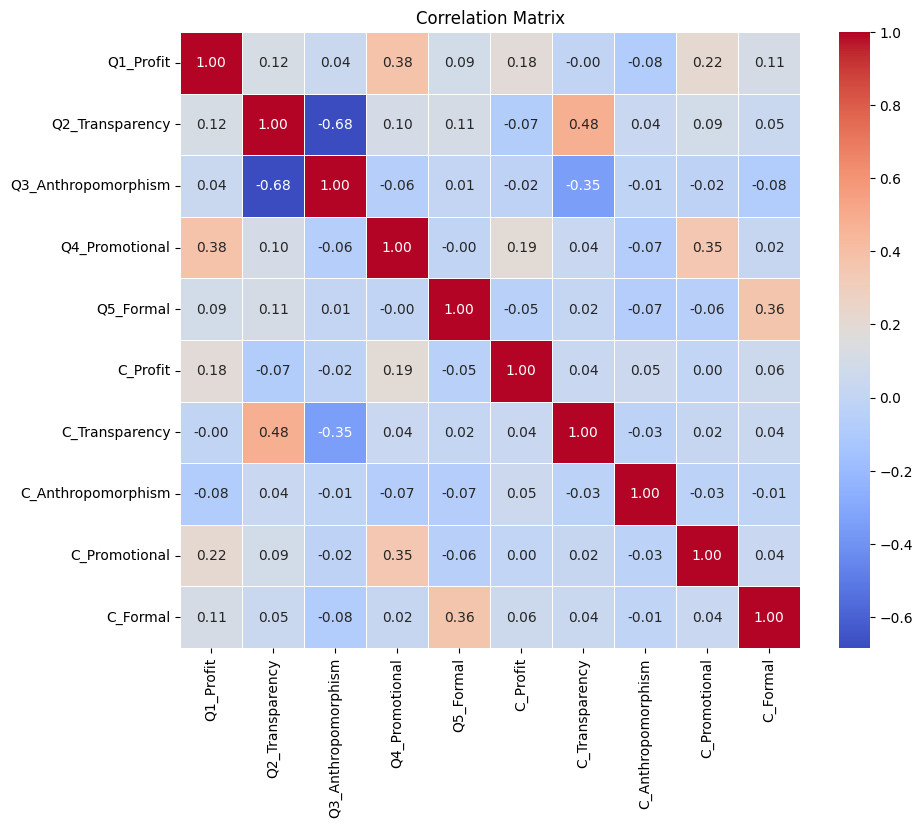

In [11]:
# Define numerical_data to include the specified columns
numerical_data = dataF[['Q1_Profit', 'Q2_Transparency', 'Q3_Anthropomorphism', 'Q4_Promotional', 'Q5_Formal',
                        'C_Profit', 'C_Transparency', 'C_Anthropomorphism', 'C_Promotional', 'C_Formal']]

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### The correlation analysis suggests the following:

1. **Strong Negative Correlation**:
   - **Q2_Transparency and Q3_Anthropomorphism**: There is a strong negative correlation (-0.68), indicating that as perceptions of transparency increase, perceptions of anthropomorphism tend to decrease, and vice versa.

2. **Moderate Positive Correlation**:
   - **Q1_Profit and Q4_Promotional**: There is a moderate positive correlation (0.38), suggesting that higher perceptions of profit are associated with higher perceptions of promotional aspects.
   - **Q2_Transparency and C_Transparency**: There is a moderate positive correlation (0.48), indicating that those who perceive higher transparency in responses also tend to have higher transparency scores.

3. **Other Notable Correlations**:
   - **Q4_Promotional and C_Promotional**: A positive correlation (0.35), suggesting that promotional perceptions are consistently aligned across different measures.
   - **Q5_Formal and C_Formal**: A moderate positive correlation (0.36), indicating consistency in formality perceptions.

4. **Weak or No Significant Correlations**:
   - Most other correlations are weak or close to zero, indicating little to no linear relationship between those pairs of variables.

### Summary:
The correlation matrix highlights key relationships between different variables. Specifically, transparency and anthropomorphism have a notable inverse relationship, while profit and promotional aspects show a moderate positive relationship. Other variables demonstrate weaker correlations, indicating more independent variations among them.

Next step: Data Distribution

In [55]:
# List of Likert scale columns to test
columns_to_test = ['Q1_Profit', 'Q2_Transparency', 'Q3_Anthropomorphism', 'Q4_Promotional', 'Q5_Formal']

# Dictionary to store the results
normality_results = {}

# Perform Shapiro-Wilk test on each column
for column in columns_to_test:
    stat, p_value = shapiro(dataF[column])
    normality_results[column] = (stat, p_value)
    print(f'Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}')

# Interpretation
for column, results in normality_results.items():
    stat, p_value = results
    if p_value > 0.05:
        print(f"The data in '{column}' appear to be normally distributed (fail to reject H0).")
    else:
        print(f"The data in '{column}' do not appear to be normally distributed (reject H0).")

Shapiro-Wilk test for Q1_Profit: Statistic=0.8525384630997426, p-value=2.9060009462988924e-13
Shapiro-Wilk test for Q2_Transparency: Statistic=0.8956398505965042, p-value=7.381884701746748e-11
Shapiro-Wilk test for Q3_Anthropomorphism: Statistic=0.9004865031037179, p-value=1.5059609341463394e-10
Shapiro-Wilk test for Q4_Promotional: Statistic=0.7929752796177972, p-value=6.914268109828438e-16
Shapiro-Wilk test for Q5_Formal: Statistic=0.9047234387673505, p-value=2.86186047091846e-10
The data in 'Q1_Profit' do not appear to be normally distributed (reject H0).
The data in 'Q2_Transparency' do not appear to be normally distributed (reject H0).
The data in 'Q3_Anthropomorphism' do not appear to be normally distributed (reject H0).
The data in 'Q4_Promotional' do not appear to be normally distributed (reject H0).
The data in 'Q5_Formal' do not appear to be normally distributed (reject H0).


- The Shapiro-Wilk tests show that all variables (Q1_Profit, Q2_Transparency, Q3_Anthropomorphism, Q4_Promotional, Q5_Formal) do not follow a normal distribution, as evidenced by very low p-values in each case.

- Since the data doesn't follow a normal distribution, using parametric tests like the t-test would not be appropriate. Instead, the Mann-Whitney U test has been chosen due to its suitability for analyzing Likert scale data, which typically deviates from normality. This test is robust to outliers and doesn't require the assumption of normality, making it a suitable choice for ordinal data. This aligns with methodological rigor and enhances the credibility of the study's findings.

In [13]:
# Columns of interest
question_columns = ['Q1_Profit', 'Q2_Transparency', 'Q3_Anthropomorphism', 'Q4_Promotional', 'Q5_Formal']
characteristic_columns = ['C_Profit', 'C_Transparency', 'C_Anthropomorphism', 'C_Promotional', 'C_Formal']

# Convert question columns to numeric
dataF[question_columns] = dataF[question_columns].apply(pd.to_numeric, errors='coerce')

# Perform Mann-Whitney U test for each question with its corresponding characteristic
for question_column, characteristic_column in zip(question_columns, characteristic_columns):
    # Filter data for each group
    group0 = dataF[dataF[characteristic_column] == 0][question_column]
    group1 = dataF[dataF[characteristic_column] == 1][question_column]
    
    # Ensure groups are not empty
    if not group0.empty and not group1.empty:
        # Perform Mann-Whitney U test
        u_statistic, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
        
        # Print results
        print("Mann-Whitney U test for", question_column, "with", characteristic_column)
        print("U statistic:", u_statistic)
        print("p-value:", p_value)
    else:
        print("One or both groups are empty for", question_column, "with", characteristic_column)

Mann-Whitney U test for Q1_Profit with C_Profit
U statistic: 4458.0
p-value: 0.020644496981557483
Mann-Whitney U test for Q2_Transparency with C_Transparency
U statistic: 2436.5
p-value: 2.30060173605137e-12
Mann-Whitney U test for Q3_Anthropomorphism with C_Anthropomorphism
U statistic: 5491.0
p-value: 0.8430815475450113
Mann-Whitney U test for Q4_Promotional with C_Promotional
U statistic: 3505.0
p-value: 2.2150650205550966e-06
Mann-Whitney U test for Q5_Formal with C_Formal
U statistic: 3219.0
p-value: 2.075277862706517e-07


### Overall results:

The results of the Mann-Whitney U tests provide insights into whether there are significant differences in the distributions of the Likert-scale responses (questions) between the two groups defined by their binary characteristics.

1. **Q1_Profit with C_Profit**:
   - The p-value (0.0206) is less than the significance level (usually set at 0.05), suggesting that there is a statistically significant difference in the distribution of responses to Q1_Profit between the two groups defined by C_Profit.

2. **Q2_Transparency with C_Transparency**:
   - The extremely small p-value (2.30e-12) indicates a highly significant difference in the distribution of responses to Q2_Transparency between the two groups defined by C_Transparency.

3. **Q3_Anthropomorphism with C_Anthropomorphism**:
   - The p-value (0.843) is much greater than the significance level, suggesting no significant difference in the distribution of responses to Q3_Anthropomorphism between the two groups defined by C_Anthropomorphism.

4. **Q4_Promotional with C_Promotional**:
   - The very small p-value (2.22e-06) suggests a highly significant difference in the distribution of responses to Q4_Promotional between the two groups defined by C_Promotional.

5. **Q5_Formal with C_Formal**:
   - Similarly, the very small p-value (2.08e-07) indicates a highly significant difference in the distribution of responses to Q5_Formal between the two groups defined by C_Formal.

### Interpretation:
- For Q1_Profit, Q2_Transparency, Q4_Promotional, and Q5_Formal, there are statistically significant differences between the groups defined by their respective characteristics.
- However, for Q3_Anthropomorphism, there is no evidence of a significant difference between the groups defined by C_Anthropomorphism.

These results suggest that the characteristics C_Profit, C_Transparency, C_Promotional, and C_Formal significantly influence respondents' perceptions of Q1_Profit, Q2_Transparency, Q4_Promotional, and Q5_Formal, respectively. On the other hand, C_Anthropomorphism does not seem to have a significant impact on respondents' perceptions of Q3_Anthropomorphism. 

### My study:
- When it comes to my manipulation check, the following can be derived:

- Q1_Profit with C_Profit
Interpretation: The p-value is less than 0.05, indicating a statistically significant difference in the median values of Q1_Profit between the groups defined by C_Profit. This suggests that the manipulation of profit perception successfully influenced participants' responses regarding profit-related questions. Therefore, the manipulation appears to have effectively influenced perceptions of profit.

- Q2_Transparency with C_Transparency
Interpretation: The p-value is significantly less than 0.05, indicating a statistically significant difference in the median values of Q2_Transparency between the groups defined by C_Transparency. This suggests that the manipulation of transparency perception successfully influenced participants' responses regarding transparency-related questions. Therefore, the manipulation appears to have effectively influenced perceptions of transparency.

- Q4_Promotional with C_Promotional
Interpretation: The p-value is significantly below 0.05, indicating a statistically significant difference in the median values of Q4_Promotional between the groups defined by C_Promotional. This suggests that the manipulation of promotional perception successfully influenced participants' responses regarding promotional-related questions. Therefore, the manipulation appears to have effectively influenced perceptions of promotional content.


_________________________________________________________________________________________________________________________________________________________________________________________________________________________

# MAIN STUDY ANALYSIS

In [14]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from pyprocessmacro import Process
from statsmodels.formula.api import ols

In [15]:
# Define path
os.chdir("/Users/m.avdejev/Desktop/HVA_DDB/Thesis/Survey/Main study")

In [16]:
# Read the csv file
raw_data = pd.read_csv("raw_data.csv")

In [17]:
# Print the first rows
print(raw_data)

      ans_id V001b  V002           V004_1           V004_2           V004_3  \
0          1    Ja    21  Zeer mee oneens  Zeer mee oneens  Zeer mee oneens   
1          2    Ja     9         Mee eens         Neutraal         Mee eens   
2          3    Ja    11         Mee eens         Mee eens         Mee eens   
3          4    Ja    24         Neutraal         Mee eens       Mee oneens   
4          5    Ja     2       Mee oneens         Neutraal       Mee oneens   
...      ...   ...   ...              ...              ...              ...   
2202    2203    Ja     3         Mee eens    Zeer mee eens         Mee eens   
2203    2204    Ja    10         Neutraal         Neutraal         Neutraal   
2204    2205    Ja    15       Mee oneens         Mee eens         Mee eens   
2205    2206    Ja     7       Mee oneens         Mee eens       Mee oneens   
2206    2207    Ja    25         Neutraal         Neutraal         Mee eens   

             V004_4           V004_5           V004

- The initial dataset contains 2207 rows and 52 columns.
- The column `ans_id` represents an answer ID.
- `V001b` indicates the agreement to participate in the study, which will be analyzed below.
- `V002` denotes the type of email shown to a participant. Characteristics of the email will be further added to the dataframe during the Data Engineering phase, with the creation of five dummy columns with binary variables (0 or 1): Profit, Transparency, Anthropomorphism, Promotional, and Formal.
- Columns `V004_1` to `V013_4` represent responses to the survey questions.
- Columns `V014`, `V015`, `V016`, `V016_o`, `V017`, and `V017_o` capture demographic information about the participants, such as Gender, Age, Education, and Employment.

In [18]:
# Count the number of occurrences of "Ja" in column V001b
ja_count = raw_data['V001b'].value_counts().get('Ja', 0)

print(f'Number of people who said "Ja": {ja_count}')

Number of people who said "Ja": 2207


All 2207 participants have agreed to participate in this study

## 1.0 DATA ENGINEERING

In [19]:
# Convert nominal answers to numerical values: Zeer mee oneens, Mee oneens, Neutraal, Mee eens, Zeer mee eens into numerical values, 
# where 1 = Zeer mee oneens, 2 = Mee oneens, 3 = Neutraal, 4 = Mee eens, 5 = Zeer mee eens

# Define the mapping dictionary
mapping = {
    'Zeer mee oneens': 1,
    'Mee oneens': 2,
    'Neutraal': 3,
    'Mee eens': 4,
    'Zeer mee eens': 5
}

# Apply the mapping to the entire dataframe
raw_data = raw_data.replace(mapping)

# Display the updated dataframe
raw_data.head()

/var/folders/sz/jmzmv2fn1kz97717_kks5fzc0000gn/T/ipykernel_53724/1253714610.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data = raw_data.replace(mapping)


,ans_id,V001b,V002,V004_1,V004_2,V004_3,V004_4,V004_5,V004_6,V005_1,...,V013_4,V014,V015,V016,V016_o,V017,V017_o,Age_cat,Edu_cat,Weging
0,1,Ja,21,1,1,1,5,1,1,3,...,1,Vrouw,39,Master (HBO/WO),,Fulltime werkzaam (35 uur of meer per week),,35-44 jaar,Hoog,0.64439
1,2,Ja,9,4,3,4,4,3,4,4,...,1,Man,22,"HAVO, VWO, MBO 2-4",,Studerend,,18-24 jaar,Middelbaar,"149,341"
2,3,Ja,11,4,4,4,4,4,4,4,...,3,Man,31,"VMBO, HAVO/VWO onderbouw, MBO 1",,Fulltime werkzaam (35 uur of meer per week),,25-34 jaar,Laag,"254,575"
3,4,Ja,24,3,4,2,3,4,3,3,...,2,Man,50,"HAVO, VWO, MBO 2-4",,Fulltime werkzaam (35 uur of meer per week),,45-54 jaar,Middelbaar,"129,961"
4,5,Ja,2,2,3,2,4,5,2,1,...,2,Man,23,"HAVO, VWO, MBO 2-4",,Studerend,,18-24 jaar,Middelbaar,"149,341"


In [20]:
# Create dummy variables for Demographic columns (Education and Gender)
# Create dummy columns
raw_data['Edu_cat_Hoog'] = (raw_data['Edu_cat'] == 'Hoog').astype(int)
raw_data['Edu_cat_Middelbaar'] = (raw_data['Edu_cat'] == 'Middelbaar').astype(int)
raw_data['Edu_cat_Laag'] = (raw_data['Edu_cat'] == 'Laag').astype(int)

# Create dummy columns for Gender
raw_data['Gender_Non-binair'] = (raw_data['V014'] == 'Non-binair').astype(int)
raw_data['Gender_Vrouw'] = (raw_data['V014'] == 'Vrouw').astype(int)
raw_data['Gender_Man'] = (raw_data['V014'] == 'Man').astype(int)

# Display the resulting dataframe
raw_data.head()

,ans_id,V001b,V002,V004_1,V004_2,V004_3,V004_4,V004_5,V004_6,V005_1,...,V017_o,Age_cat,Edu_cat,Weging,Edu_cat_Hoog,Edu_cat_Middelbaar,Edu_cat_Laag,Gender_Non-binair,Gender_Vrouw,Gender_Man
0,1,Ja,21,1,1,1,5,1,1,3,...,,35-44 jaar,Hoog,0.64439,1,0,0,0,1,0
1,2,Ja,9,4,3,4,4,3,4,4,...,,18-24 jaar,Middelbaar,"149,341",0,1,0,0,0,1
2,3,Ja,11,4,4,4,4,4,4,4,...,,25-34 jaar,Laag,"254,575",0,0,1,0,0,1
3,4,Ja,24,3,4,2,3,4,3,3,...,,45-54 jaar,Middelbaar,"129,961",0,1,0,0,0,1
4,5,Ja,2,2,3,2,4,5,2,1,...,,18-24 jaar,Middelbaar,"149,341",0,1,0,0,0,1


In [21]:
# Let's give emails binary characteristics for further analysis
# Initialize the new columns with blank values
raw_data['Profit'] = ""
raw_data['Transparency'] = ""
raw_data['Anthropomorphism'] = ""
raw_data['Promotional'] = ""
raw_data['Formal'] = ""

# Function to apply conditions based on V002 value
def apply_conditions(row):
    if row['V002'] == 1:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 2:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 3:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 4:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 5:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 6:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 7:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 8:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 9:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 10:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 11:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 12:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 13:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 14:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 15:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 16:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 0; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 17:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 18:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 19:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 20:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 21:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 22:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 23:
        row['Profit'] = 1; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 24:
        row['Profit'] = 1; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 25:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 26:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 1
    elif row['V002'] == 27:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 28:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 0; row['Formal'] = 0
    elif row['V002'] == 29:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 30:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 1
    elif row['V002'] == 31:
        row['Profit'] = 0; row['Transparency'] = 1; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 0
    elif row['V002'] == 32:
        row['Profit'] = 0; row['Transparency'] = 0; row['Anthropomorphism'] = 1; row['Promotional'] = 1; row['Formal'] = 0
    return row

# Apply the function to each row in the DataFrame
raw_data = raw_data.apply(apply_conditions, axis=1)

# Display the modified DataFrame
print(raw_data)

      ans_id V001b  V002  V004_1  V004_2  V004_3  V004_4  V004_5  V004_6  \
0          1    Ja    21       1       1       1       5       1       1   
1          2    Ja     9       4       3       4       4       3       4   
2          3    Ja    11       4       4       4       4       4       4   
3          4    Ja    24       3       4       2       3       4       3   
4          5    Ja     2       2       3       2       4       5       2   
...      ...   ...   ...     ...     ...     ...     ...     ...     ...   
2202    2203    Ja     3       4       5       4       2       5       5   
2203    2204    Ja    10       3       3       3       3       3       3   
2204    2205    Ja    15       2       4       4       5       3       3   
2205    2206    Ja     7       2       4       2       4       4       2   
2206    2207    Ja    25       3       3       4       4       4       3   

      V005_1  ...  Edu_cat_Middelbaar  Edu_cat_Laag  Gender_Non-binair  \
0          3 

In [22]:
# Check if the columns were created
raw_data.head()

,ans_id,V001b,V002,V004_1,V004_2,V004_3,V004_4,V004_5,V004_6,V005_1,...,Edu_cat_Middelbaar,Edu_cat_Laag,Gender_Non-binair,Gender_Vrouw,Gender_Man,Profit,Transparency,Anthropomorphism,Promotional,Formal
0,1,Ja,21,1,1,1,5,1,1,3,...,0,0,0,1,0,1,1,1,1,1
1,2,Ja,9,4,3,4,4,3,4,4,...,1,0,0,0,1,0,1,0,0,1
2,3,Ja,11,4,4,4,4,4,4,4,...,0,1,0,0,1,0,1,0,0,0
3,4,Ja,24,3,4,2,3,4,3,3,...,1,0,0,0,1,1,0,1,1,0
4,5,Ja,2,2,3,2,4,5,2,1,...,1,0,0,0,1,1,0,0,0,1


In [23]:
# For the sake of comfort working with data rename the columns
raw_data.rename(columns={
    'V002': 'Email_used',
    'V014': 'Gender',
    'V015': 'Age',
    'V016': 'Education',
    'V016_o': 'Education_other',
    'V017': 'Employment',
    'V017_o': 'Employment_other',
    'V004_1': 'Trust_1',
    'V004_2': 'Trust_2',
    'V004_3': 'Trust_3',
    'V004_4': 'Trust_4',
    'V004_5': 'Trust_5',
    'V004_6': 'Trust_6',
    'V005_1': 'Brand_image_1',
    'V005_2': 'Brand_image_2',	
    'V005_3': 'Brand_image_3',
    'V006_1': 'Purchase_int_1',
    'V006_2': 'Purchase_int_2',	
    'V006_3': 'Purchase_int_3',	
    'V006_4': 'Purchase_int_4',	
    'V007_1': 'Disp_to_trust_1',
    'V007_2': 'Disp_to_trust_2',	
    'V007_3': 'Disp_to_trust_3',	
    'V007_4': 'Disp_to_trust_4',	
    'V007_5': 'Disp_to_trust_5',
    'V008_1': 'Communication_st_1',
    'V008_2': 'Communication_st_2',	
    'V008_3': 'Communication_st_3',	
    'V008_4': 'Communication_st_4',	
    'V008_5': 'Communication_st_5',
    'V009_1': 'Email_type_1',
    'V009_2': 'Email_type_2',
    'V009_3': 'Email_type_3',
    'V009_4': 'Email_type_4',
    'V010_1': 'Social_pr_1',
    'V010_2': 'Social_pr_2',
    'V010_3': 'Social_pr_3',
    'V011_1': 'Transparency_1',
    'V011_2': 'Transparency_2',
    'V011_3': 'Transparency_3',
    'V012_1': 'Anthrop_1',
    'V012_2': 'Anthrop_2',
    'V012_3': 'Anthrop_3',
    'V013_1': 'GAI_awareness_1',
    'V013_2': 'GAI_awareness_2',
    'V013_3': 'GAI_awareness_3',
    'V013_4': 'GAI_awareness_4'
}, inplace=True)

raw_data.head()

,ans_id,V001b,Email_used,Trust_1,Trust_2,Trust_3,Trust_4,Trust_5,Trust_6,Brand_image_1,...,Edu_cat_Middelbaar,Edu_cat_Laag,Gender_Non-binair,Gender_Vrouw,Gender_Man,Profit,Transparency,Anthropomorphism,Promotional,Formal
0,1,Ja,21,1,1,1,5,1,1,3,...,0,0,0,1,0,1,1,1,1,1
1,2,Ja,9,4,3,4,4,3,4,4,...,1,0,0,0,1,0,1,0,0,1
2,3,Ja,11,4,4,4,4,4,4,4,...,0,1,0,0,1,0,1,0,0,0
3,4,Ja,24,3,4,2,3,4,3,3,...,1,0,0,0,1,1,0,1,1,0
4,5,Ja,2,2,3,2,4,5,2,1,...,1,0,0,0,1,1,0,0,0,1


## 2.0 DESCRIPTIVE STATISTICS

In [24]:
# Check for missing values
total_missing = raw_data.isnull().sum().sum()
print(f"Total missing values in the DataFrame: {total_missing}")

Total missing values in the DataFrame: 0


No missing values identified

In [25]:
summary_statistics = raw_data.describe()
print(summary_statistics)

            ans_id   Email_used      Trust_1      Trust_2      Trust_3  \
count  2207.000000  2207.000000  2207.000000  2207.000000  2207.000000   
mean   1104.000000    16.422746     2.818305     3.187132     2.949705   
std     637.250343     9.102533     0.909340     0.892122     0.972751   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%     552.500000     9.000000     2.000000     3.000000     2.000000   
50%    1104.000000    16.000000     3.000000     3.000000     3.000000   
75%    1655.500000    24.000000     3.000000     4.000000     4.000000   
max    2207.000000    32.000000     5.000000     5.000000     5.000000   

           Trust_4      Trust_5      Trust_6  Brand_image_1  Brand_image_2  \
count  2207.000000  2207.000000  2207.000000    2207.000000    2207.000000   
mean      3.450385     3.329860     2.840507       2.785229       2.661531   
std       1.028232     0.992689     0.968183       1.031727       0.963091   
min       1.000000   

Data can be split into Likert scale columns and Demographic columns, both parts will be analysed through descriptive statistics below

### Descriptive Statistics Results Likert scale

The descriptive statistics for the Likert scale data (1-5) show:

- **Trust**: Mean values range from 2.82 to 3.45, with standard deviations around 0.91 to 1.03, indicating moderate trust levels.
- **Brand Image**: Means range from 2.66 to 2.79, with standard deviations around 0.96 to 1.05, suggesting moderate perceptions.
- **Purchase Intention**: Means around 2.66 to 2.92, with standard deviations around 1.03 to 1.08, indicating moderate purchase intentions.
- **Disposition to Trust**: Means from 3.24 to 3.38, with standard deviations from 0.86 to 0.93, reflecting slightly positive trust dispositions.
- **Communication Style, Email Type, Social Presence, Transparency, Anthropomorphism, and GAI Awareness**: Means range from 2.23 to 3.69, indicating moderate to slightly positive perceptions.

Overall, responses are generally moderate across these metrics, with some variability indicated by the standard deviations. The median values often reflect neutrality or slight agreement.

Since the majority of the the columns represent Likert scale answers (1-5) to the survey, not much can be derived from the statistics above, however, Demographics data can be analysed and interpreted

In [26]:
# Demographics
# Descriptive statistics for specified columns
columns = ['Gender', 'Education', 'Employment', 'Age_cat', 'Edu_cat', 'Age']
summaries = {col: raw_data[col].describe() if raw_data[col].dtype != 'object' else raw_data[col].value_counts() for col in columns}

# Display summaries for each column
for col, summary in summaries.items():
    if col == 'Age':
        print(f"\n{col}:\n{summary.to_string()}")
    else:
        print(f"\n{col}:\n{summary.to_string(header=False)}")


Gender:
Vrouw         1114
Man           1085
Non-binair       8

Education:
HAVO, VWO, MBO 2-4                 725
Bachelor (HBO/WO)                  618
Master (HBO/WO)                    477
VMBO, HAVO/VWO onderbouw, MBO 1    325
Doctor, PhD                         39
Basisonderwijs                      19
Geen diploma                         4

Employment:
Fulltime werkzaam (35 uur of meer per week)       802
Gepensioneerd                                     519
Parttime werkzaam (minder dan 35 uur per week)    492
Niet werkzaam                                     139
Studerend                                         130
Anders, namelijk:                                  88
Werkzoekend                                        37

Age_cat:
55-64 jaar    373
45-54 jaar    356
25-34 jaar    355
35-44 jaar    329
65-74 jaar    298
75+ jaar      250
18-24 jaar    246

Edu_cat:
Hoog          1134
Middelbaar     725
Laag           348

Age:
count    2207.000000
mean       49.743996
std    

### Interpretation and Description of Demographics Data

#### Categorical Data Summary

**Gender**
- **Vrouw (Female)**: 1114 respondents
- **Man (Male)**: 1085 respondents
- **Non-binair (Non-binary)**: 8 respondents

**Interpretation**: The gender distribution is nearly balanced between females and males, with a very small proportion identifying as non-binary.

**Education**
- **HAVO, VWO, MBO 2-4**: 725 respondents
- **Bachelor (HBO/WO)**: 618 respondents
- **Master (HBO/WO)**: 477 respondents
- **VMBO, HAVO/VWO onderbouw, MBO 1**: 325 respondents
- **Doctor, PhD**: 39 respondents
- **Basisonderwijs (Primary Education)**: 19 respondents
- **Geen diploma (No Diploma)**: 4 respondents

**Interpretation**: The majority of respondents have at least a secondary education, with a significant number holding a Bachelor's or Master's degree. A small proportion have no diploma or only primary education.

**Employment**
- **Fulltime werkzaam (35 uur of meer per week)**: 802 respondents
- **Gepensioneerd (Retired)**: 519 respondents
- **Parttime werkzaam (minder dan 35 uur per week)**: 492 respondents
- **Niet werkzaam (Not Working)**: 139 respondents
- **Studerend (Studying)**: 130 respondents
- **Anders, namelijk (Other, namely)**: 88 respondents
- **Werkzoekend (Job Seeking)**: 37 respondents

**Interpretation**: The largest employment category is full-time workers, followed by retirees and part-time workers. There are smaller groups of non-working, studying, and job-seeking individuals, with a few indicating other forms of employment.

**Age Category**
- **55-64 jaar**: 373 respondents
- **45-54 jaar**: 356 respondents
- **25-34 jaar**: 355 respondents
- **35-44 jaar**: 329 respondents
- **65-74 jaar**: 298 respondents
- **75+ jaar**: 250 respondents
- **18-24 jaar**: 246 respondents

**Interpretation**: The age distribution shows a higher concentration of respondents in the 55-64 age range, followed by those aged 45-54 and 25-34. There is a relatively even spread among other age categories, with the smallest group being 18-24 year olds.

**Education Category (Edu_cat)**
- **Hoog (High)**: 1134 respondents
- **Middelbaar (Middle)**: 725 respondents
- **Laag (Low)**: 348 respondents

**Interpretation**: A majority of respondents have high education levels, with a significant number also in the middle education category. A smaller proportion of respondents have low education levels.

#### Numerical Data Summary

**Age**
- **Count**: 2207 respondents
- **Mean Age**: 49.74 years
- **Standard Deviation**: 18.58 years
- **Minimum Age**: 18 years
- **25th Percentile**: 33 years
- **Median (50th Percentile)**: 51 years
- **75th Percentile**: 64 years
- **Maximum Age**: 92 years

**Interpretation**: The average age of respondents is approximately 50 years, with a broad range spanning from 18 to 92 years. The distribution is fairly spread out, with 50% of respondents aged between 33 and 64 years. The data indicate a diverse age range among the respondents.

### Summary
The demographic data show a balanced gender distribution, a high level of educational attainment among respondents, and a diverse range of ages. The employment status indicates a significant proportion of full-time workers, followed by retirees and part-time workers. The education categories align with the high educational attainment observed. The numerical summary of age further emphasizes the wide age range, providing a comprehensive view of the demographics of the surveyed population. 

These demographics provide crucial context for understanding the responses and behaviors of different segments within the population, which can inform targeted strategies and interventions.

/var/folders/sz/jmzmv2fn1kz97717_kks5fzc0000gn/T/ipykernel_53724/3973468656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x=col, palette='viridis')


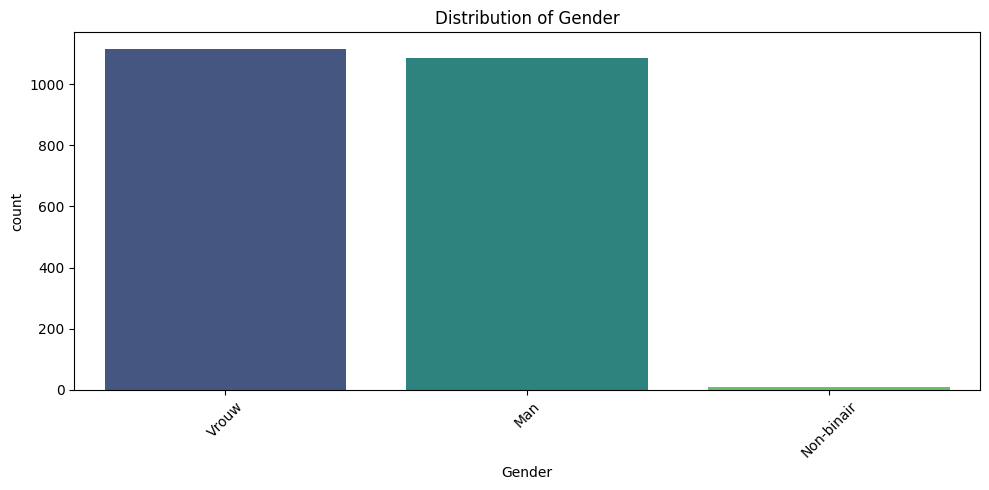

/var/folders/sz/jmzmv2fn1kz97717_kks5fzc0000gn/T/ipykernel_53724/3973468656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x=col, palette='viridis')


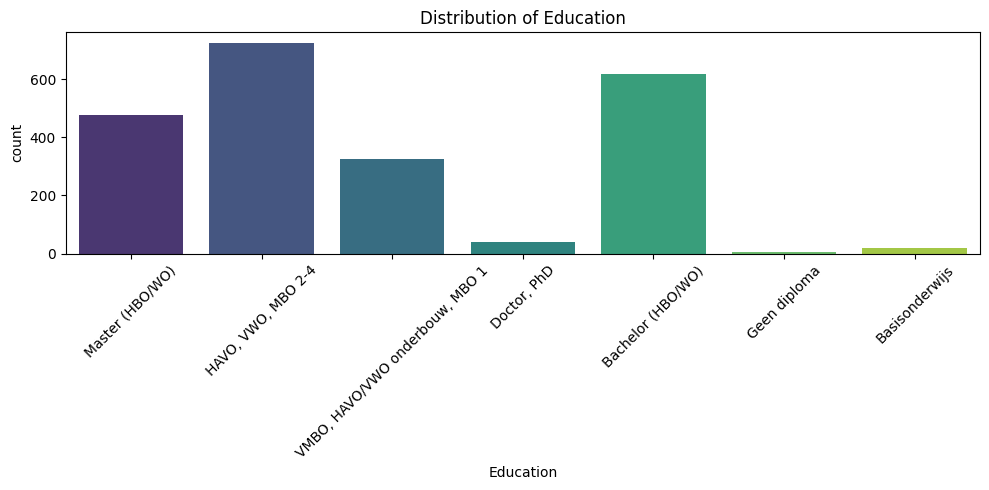

/var/folders/sz/jmzmv2fn1kz97717_kks5fzc0000gn/T/ipykernel_53724/3973468656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x=col, palette='viridis')


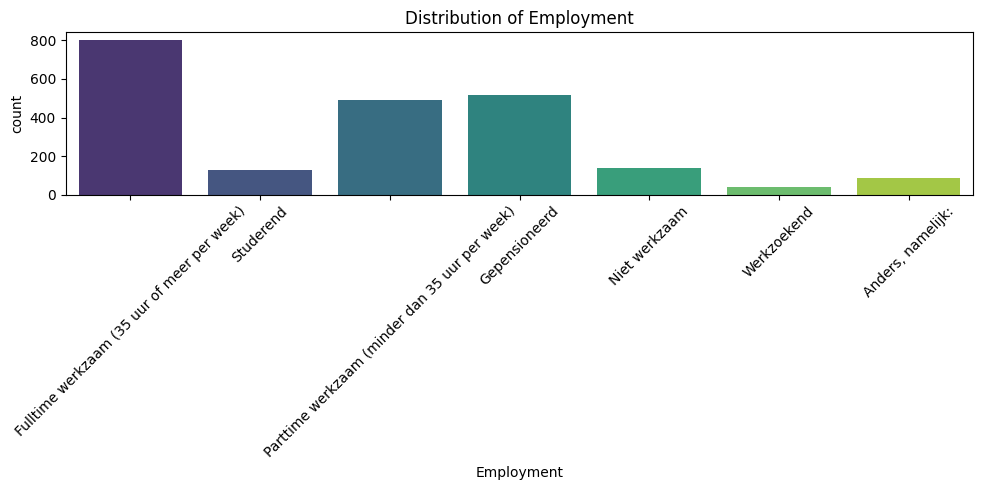

/var/folders/sz/jmzmv2fn1kz97717_kks5fzc0000gn/T/ipykernel_53724/3973468656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x=col, palette='viridis')


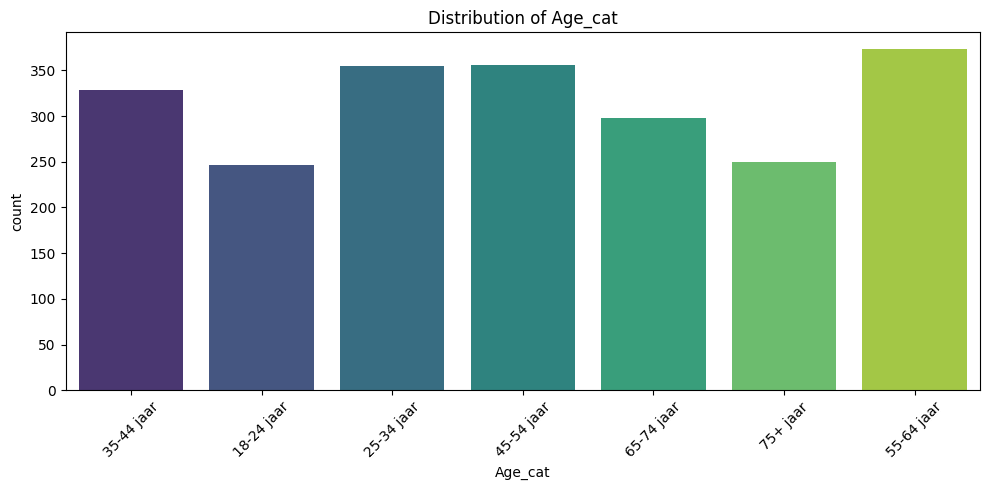

/var/folders/sz/jmzmv2fn1kz97717_kks5fzc0000gn/T/ipykernel_53724/3973468656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x=col, palette='viridis')


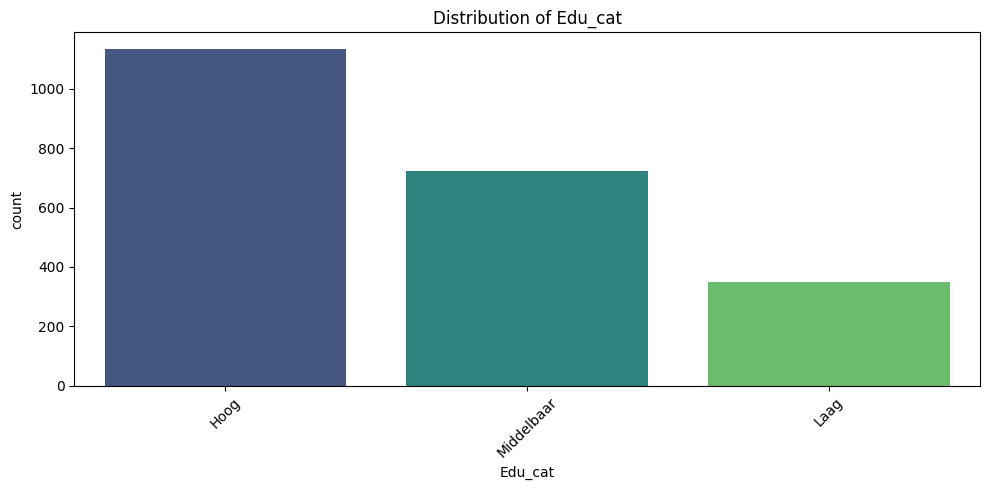

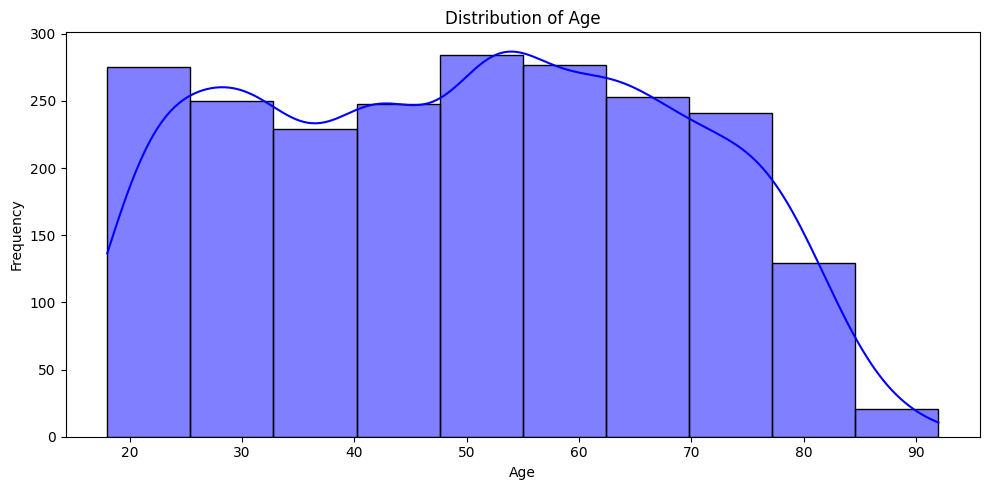

In [27]:
# Plotting Demographics data for better visual representation
# Plotting the categorical data
for col in ['Gender', 'Education', 'Employment', 'Age_cat', 'Edu_cat']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=raw_data, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the numerical data
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['Age'], bins=10, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Moving on towards measuring the consistency of the scale data using Cronbach's Alpha

In [28]:
# Calculating Cronbach's Alpha's for Likert scale columns: Trust, Brand Image, Purchase Intention, Disposition to Trust, Communication Style, Email Type, Social Presence, Transparency, Anthropomorphism, GAI Awareness
# and creating corresponding columns with mean value (Cronbach's Alpha)

# Function to calculate Cronbach's Alpha for Trust
def cronbach_alpha(df):
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    num_items = df.shape[1]
    alpha = (num_items / (num_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

# Ensure the trust columns are numeric (in case of any data issues)
trust_columns = ['Trust_1', 'Trust_2', 'Trust_3', 'Trust_4', 'Trust_5', 'Trust_6']
trust_data = raw_data[trust_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Trust columns
alpha = cronbach_alpha(trust_data)

# Create a new column 'Trust' with the mean value of Trust columns
raw_data['Trust'] = trust_data.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Trust: {alpha}")


# Function to calculate Cronbach's Alpha for Brand image
# Ensure the brand image columns are numeric (in case of any data issues)
brand_image_columns = ['Brand_image_1', 'Brand_image_2', 'Brand_image_3']
Brand_image = raw_data[brand_image_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Brand Image columns
alpha = cronbach_alpha(Brand_image)

# Create a new column 'Brand_image' with the mean value of Brand Image columns
raw_data['Brand_image'] = Brand_image.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Brand Image: {alpha}")


# Function to calculate Cronbach's Alpha for Purchase Intention
# Ensure the Purchase Intention columns are numeric (in case of any data issues)
purchase_intention_columns = ['Purchase_int_1', 'Purchase_int_2', 'Purchase_int_3', 'Purchase_int_4']
Purchase_intention = raw_data[purchase_intention_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Purchase Intention columns
alpha = cronbach_alpha(Purchase_intention)

# Create a new column 'Purchase_intention' with the mean value of Purchase Intention columns
raw_data['Purchase_intention'] = Purchase_intention.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Purchase Intention: {alpha}")


# Function to calculate Cronbach's Alpha for Disposition to Trust
# Ensure the Disposition to Trust columns are numeric (in case of any data issues)
dispostion_to_trust_columns = ['Disp_to_trust_1', 'Disp_to_trust_2', 'Disp_to_trust_3', 'Disp_to_trust_4', 'Disp_to_trust_5']
Disp_to_trust = raw_data[dispostion_to_trust_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Disposition to Trust columns
alpha = cronbach_alpha(Disp_to_trust)

# Create a new column 'Disp_to_trust' with the mean value of Disposition to Trust columns
raw_data['Disp_to_trust'] = Disp_to_trust.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Disposition to Trust: {alpha}")


# Function to calculate Cronbach's Alpha for Communication Style
# Ensure the Communication Style columns are numeric (in case of any data issues)
communication_style_columns = ['Communication_st_1', 'Communication_st_2', 'Communication_st_3', 'Communication_st_4', 'Communication_st_5']
Communication_st = raw_data[communication_style_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Communication Style columns
alpha = cronbach_alpha(Communication_st)

# Create a new column 'Communication_st' with the mean value of Communication Style columns
raw_data['Communication_st'] = Communication_st.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Communication Style: {alpha}")


# Function to calculate Cronbach's Alpha for Email Type
# Ensure the Email Type columns are numeric (in case of any data issues)
email_type_columns = ['Email_type_1', 'Email_type_2', 'Email_type_3', 'Email_type_4']
Email_type = raw_data[email_type_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Email Type columns
alpha = cronbach_alpha(Email_type)

# Create a new column 'Email_type' with the mean value of Email Type columns
raw_data['Email_type'] = Email_type.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Email Type: {alpha}")


# Function to calculate Cronbach's Alpha for Social Presence
# Ensure the Social Presence columns are numeric (in case of any data issues)
social_presence_columns = ['Social_pr_1', 'Social_pr_2', 'Social_pr_3']
Social_pr = raw_data[social_presence_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Social Presence columns
alpha = cronbach_alpha(Social_pr)

# Create a new column 'Social_pr' with the mean value of Social Presence columns
raw_data['Social_pr'] = Social_pr.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Social Presence: {alpha}")


# Function to calculate Cronbach's Alpha for Transparency
# Ensure the Transparency columns are numeric (in case of any data issues)
transparency_columns = ['Transparency_1', 'Transparency_2', 'Transparency_3']
Transparency = raw_data[transparency_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Transparency columns
alpha = cronbach_alpha(Transparency)

# Create a new column 'Transparency' with the mean value of Transparency columns
raw_data['Transparency'] = Transparency.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Transparency: {alpha}")


# Function to calculate Cronbach's Alpha for Anthropomorphism
# Ensure the Anthropomorphism columns are numeric (in case of any data issues)
anthropomorphism_columns = ['Anthrop_1', 'Anthrop_2', 'Anthrop_3']
Anthrop = raw_data[anthropomorphism_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Anthropomorphism columns
alpha = cronbach_alpha(Anthrop)

# Create a new column 'Anthrop' with the mean value of Anthropomorphism columns
raw_data['Anthrop'] = Anthrop.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Anthropomorphism: {alpha}")


# Function to calculate Cronbach's Alpha for GAI Awareness
# Ensure the GAI Awareness columns are numeric (in case of any data issues)
GAI_awareness_columns = ['GAI_awareness_1', 'GAI_awareness_2', 'GAI_awareness_3', 'GAI_awareness_4']
GAI_awareness = raw_data[GAI_awareness_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the GAI Awareness columns
alpha = cronbach_alpha(GAI_awareness)

# Create a new column 'GAI_awareness' with the mean value of GAI Awareness columns
raw_data['GAI_awareness'] = GAI_awareness.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for GAI Awareness: {alpha}")

Cronbach's Alpha for Trust: 0.5386959176507493
Cronbach's Alpha for Brand Image: 0.8970246550466343
Cronbach's Alpha for Purchase Intention: 0.9185238669315391
Cronbach's Alpha for Disposition to Trust: 0.9060073496124731
Cronbach's Alpha for Communication Style: -0.14794148760903875
Cronbach's Alpha for Email Type: 0.5871812889582549
Cronbach's Alpha for Social Presence: 0.9405634020328422
Cronbach's Alpha for Transparency: 0.48755636285779325
Cronbach's Alpha for Anthropomorphism: 0.8180994426611041
Cronbach's Alpha for GAI Awareness: 0.4153338703856684


### Interpretation
Cronbach's Alpha is a measure of internal consistency or reliability of a set of scale or test items. It ranges from -1 to 1, but for practical purposes, values closer to 1 are considered more reliable. Here is the interpretation of the given Cronbach's Alpha values:

1. **Trust: 0.5386959176507493**
   - This value indicates moderate reliability. It is above 0.5 but not close to the desired threshold of 0.7 for acceptable reliability.

2. **Brand Image: 0.8970246550466343**
   - This value indicates high reliability. It is well above 0.7, suggesting that the items measuring brand image are consistent.

3. **Purchase Intention: 0.9185238669315391**
   - This value indicates very high reliability. It is close to 0.9, showing excellent internal consistency for the purchase intention scale.

4. **Disposition to Trust: 0.9060073496124731**
   - This value also indicates very high reliability, similar to purchase intention. The items measuring disposition to trust are highly consistent.

5. **Communication Style: -0.14794148760903875**
   - This negative value indicates poor or problematic reliability. Negative values suggest that some items might be poorly designed or that there is a misunderstanding in how the items are interpreted.

6. **Email Type: 0.5871812889582549**
   - This value indicates moderate reliability, similar to trust. It is above 0.5 but does not reach the ideal threshold of 0.7.

7. **Social Presence: 0.9405634020328422**
   - This value indicates excellent reliability. It is well above 0.9, showing very high internal consistency for the social presence scale.

8. **Transparency: 0.48755636285779325**
   - This value indicates low reliability. It is below 0.5, suggesting that the items measuring transparency are not very consistent.

9. **Anthropomorphism: 0.8180994426611041**
   - This value indicates high reliability. It is well above 0.8, showing good internal consistency for the anthropomorphism scale.

10. **GAI Awareness: 0.4153338703856684**
    - This value indicates low reliability. It is below 0.5, suggesting that the items measuring GAI awareness are not consistent.

In summary:
- High reliability (α > 0.8): Brand Image, Purchase Intention, Disposition to Trust, Social Presence, Anthropomorphism.
- Moderate reliability (0.5 < α < 0.7): Trust, Email Type.
- Low reliability (α < 0.5): Transparency, GAI Awareness.
- Poor or problematic reliability (negative α): Communication Style.

Since some of the Cronbach's Alphas are low (Communication Style, Transparency, GAI Awareness) or moderate (Trust, Email Type), we need to check for their correlations to identify potential reverse scales. This analysis is performed in Correlation Analysis below.

In [29]:
# Check if all the newly created Cronbach's Alpha columns were added (namely: Trust	Brand_image	Purchase_intention	Disp_to_trust	Communication_st	Email_type	Social_pr	Anthrop	GAI_awareness)
raw_data.head()

,ans_id,V001b,Email_used,Trust_1,Trust_2,Trust_3,Trust_4,Trust_5,Trust_6,Brand_image_1,...,Formal,Trust,Brand_image,Purchase_intention,Disp_to_trust,Communication_st,Email_type,Social_pr,Anthrop,GAI_awareness
0,1,Ja,21,1,1,1,5,1,1,3,...,1,1.666667,2.000000,2.50,4.0,3.8,3.50,1.000000,1.666667,4.00
1,2,Ja,9,4,3,4,4,3,4,4,...,1,3.666667,3.666667,3.50,4.2,3.4,4.00,2.666667,3.000000,3.50
2,3,Ja,11,4,4,4,4,4,4,4,...,0,4.000000,4.000000,4.25,3.8,3.6,4.00,4.333333,4.000000,3.75
3,4,Ja,24,3,4,2,3,4,3,3,...,0,3.166667,3.000000,3.25,4.0,3.0,3.25,3.000000,3.000000,2.50
4,5,Ja,2,2,3,2,4,5,2,1,...,1,3.000000,1.333333,2.00,3.4,3.0,3.25,2.333333,1.666667,3.75


## 3.0 CORRELATION ANALYSIS

### Trust

In [30]:
# Select the Trust columns
trust_columns = ['Trust_1', 'Trust_2', 'Trust_3', 'Trust_4', 'Trust_5', 'Trust_6']

# Perform the correlation
correlation_matrix = raw_data[trust_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

          Trust_1   Trust_2   Trust_3   Trust_4   Trust_5   Trust_6
Trust_1  1.000000  0.486164  0.511869 -0.346350  0.172886  0.581843
Trust_2  0.486164  1.000000  0.426647 -0.148751  0.172380  0.408769
Trust_3  0.511869  0.426647  1.000000 -0.208934  0.160837  0.506011
Trust_4 -0.346350 -0.148751 -0.208934  1.000000  0.048461 -0.303475
Trust_5  0.172886  0.172380  0.160837  0.048461  1.000000  0.165131
Trust_6  0.581843  0.408769  0.506011 -0.303475  0.165131  1.000000


- The correlation matrix for the Trust scale reveals that Trust_4 has negative correlations with several other items in the scale, particularly Trust_1, Trust_2, Trust_3, and Trust_6. 
- Negative correlations like these suggest that Trust_4 is not aligning well with the other items and may be measuring the opposite concept. This is a common indication that Trust_4 is a reverse-scored item.
- To align these items with the rest of the scale, we need to reverse their scoring.

In [31]:
# Determine the maximum value of Trust_4, given that it's a 5-point Likert scale
max_value = 5

# Reverse the 'Trust_4' column
raw_data['Trust_4_R'] = max_value + 1 - raw_data['Trust_4']

# Now you can use 'Trust_4_Reversed' in your analysis
trust_columns = ['Trust_1', 'Trust_2', 'Trust_3', 'Trust_4_R', 'Trust_5', 'Trust_6']

# Perform the correlation with the reversed 'Trust_4'
correlation_matrix = raw_data[trust_columns].corr()

# Display the new correlation matrix
print(correlation_matrix)

            Trust_1   Trust_2   Trust_3  Trust_4_R   Trust_5   Trust_6
Trust_1    1.000000  0.486164  0.511869   0.346350  0.172886  0.581843
Trust_2    0.486164  1.000000  0.426647   0.148751  0.172380  0.408769
Trust_3    0.511869  0.426647  1.000000   0.208934  0.160837  0.506011
Trust_4_R  0.346350  0.148751  0.208934   1.000000 -0.048461  0.303475
Trust_5    0.172886  0.172380  0.160837  -0.048461  1.000000  0.165131
Trust_6    0.581843  0.408769  0.506011   0.303475  0.165131  1.000000


- After reversing the scores for Trust_4 (now labeled Trust_4_R), the correlations with the other items in the Trust scale have become positive, indicating improved alignment.

In [32]:
# Function to calculate Cronbach's Alpha for Trust
def cronbach_alpha(df):
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    num_items = df.shape[1]
    alpha = (num_items / (num_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

# Ensure the trust columns are numeric (in case of any data issues)
trust_columns = ['Trust_1', 'Trust_2', 'Trust_3', 'Trust_4_R', 'Trust_5', 'Trust_6']
trust_data = raw_data[trust_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Trust columns
alpha = cronbach_alpha(trust_data)

# Create a new column 'Trust' with the mean value of Trust columns
raw_data['Trust'] = trust_data.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Trust: {alpha}")


Cronbach's Alpha for Trust: 0.7159634470797339


Cronbach's Alpha for Trust has changed from moderate 0.5386959176507493 to 0.7159634470797339, representing an acceptable internal consistency (above 0.7 threshold)

### Communicartion Style

In [33]:
# Select the Communicartion Style columns
communication_style_columns = ['Communication_st_1', 'Communication_st_2', 'Communication_st_3', 'Communication_st_4', 'Communication_st_5']

# Perform the correlation
correlation_matrix = raw_data[communication_style_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                    Communication_st_1  Communication_st_2  \
Communication_st_1            1.000000           -0.489212   
Communication_st_2           -0.489212            1.000000   
Communication_st_3            0.639996           -0.454702   
Communication_st_4            0.401639           -0.238423   
Communication_st_5           -0.243458            0.349618   

                    Communication_st_3  Communication_st_4  Communication_st_5  
Communication_st_1            0.639996            0.401639           -0.243458  
Communication_st_2           -0.454702           -0.238423            0.349618  
Communication_st_3            1.000000            0.434947           -0.267295  
Communication_st_4            0.434947            1.000000           -0.443564  
Communication_st_5           -0.267295           -0.443564            1.000000  


- The initial correlation matrix for the Communication Style scale indicates that Communication_st_2 and Communication_st_5 have negative correlations with several other items in the scale.
- The negative correlations suggest that Communication_st_2 and Communication_st_5 might be measuring concepts in the opposite direction compared to the other items. This discrepancy often indicates that these items are reverse-scored.
- To align these items with the rest of the scale, we need to reverse their scoring.

In [34]:
# Determine the maximum value of the Likert scale, given that it's a 5-point Likert scale
max_value = 5

# Reverse the 'Communication_st_2' and 'Communication_st_5' columns
raw_data['Communication_st_2_r'] = max_value + 1 - raw_data['Communication_st_2']
raw_data['Communication_st_5_r'] = max_value + 1 - raw_data['Communication_st_5']

# Recompute the correlation matrix with the reversed columns
communication_columns = ['Communication_st_1', 'Communication_st_2_r', 'Communication_st_3', 
                         'Communication_st_4', 'Communication_st_5_r']

# Perform the correlation with the reversed columns
correlation_matrix = raw_data[communication_columns].corr()

# Display the new correlation matrix
print(correlation_matrix)

                      Communication_st_1  Communication_st_2_r  \
Communication_st_1              1.000000              0.489212   
Communication_st_2_r            0.489212              1.000000   
Communication_st_3              0.639996              0.454702   
Communication_st_4              0.401639              0.238423   
Communication_st_5_r            0.243458              0.349618   

                      Communication_st_3  Communication_st_4  \
Communication_st_1              0.639996            0.401639   
Communication_st_2_r            0.454702            0.238423   
Communication_st_3              1.000000            0.434947   
Communication_st_4              0.434947            1.000000   
Communication_st_5_r            0.267295            0.443564   

                      Communication_st_5_r  
Communication_st_1                0.243458  
Communication_st_2_r              0.349618  
Communication_st_3                0.267295  
Communication_st_4                0.44

- Reversing the scores of Communication_st_2 and Communication_st_5 has resulted in positive correlations with the other items in the Communication Style scale.

In [35]:
# Function to calculate Cronbach's Alpha for Communication Style
def cronbach_alpha(df):
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    num_items = df.shape[1]
    alpha = (num_items / (num_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

# Function to calculate Cronbach's Alpha for Communication Style
# Ensure the Communication Style columns are numeric (in case of any data issues)
communication_style_columns = ['Communication_st_1', 'Communication_st_2_r', 'Communication_st_3', 'Communication_st_4', 'Communication_st_5_r']
Communication_st = raw_data[communication_style_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Communication Style columns
alpha = cronbach_alpha(Communication_st)

# Create a new column 'Communication_st' with the mean value of Communication Style columns
raw_data['Communication_st'] = Communication_st.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Communication Style: {alpha}")

Cronbach's Alpha for Communication Style: 0.7676815458168098


Cronbach's Alpha for Communication Style has changed from insignificant -0.14794148760903875 to 0.7676815458168098, representing an acceptable internal consistency (above 0.7 threshold)

### Transparency

In [36]:
# Select the Transparency columns
transparency_columns = ['Transparency_1', 'Transparency_2', 'Transparency_3']

# Perform the correlation
correlation_matrix = raw_data[transparency_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                Transparency_1  Transparency_2  Transparency_3
Transparency_1        1.000000        0.099254        0.013654
Transparency_2        0.099254        1.000000        0.563465
Transparency_3        0.013654        0.563465        1.000000


Transparency_1 has the weakest correlations with the other items, indicating it may not be as strongly aligned with the underlying construct measured by the scale. Dropping Transparency_1 can improve the internal consistency and reliability of the Transparency scale by focusing on the more strongly correlated items, resulting in a more cohesive and reliable measure.

In [37]:
raw_data.drop('Transparency_1', axis=1, inplace=True)

# Recompute the correlation matrix without 'Transparency_1',
transparency_columns = ['Transparency_2', 'Transparency_3']

# Perform the correlation without 'Transparency_1'
correlation_matrix = raw_data[transparency_columns].corr()

# Display the new correlation matrix
print(correlation_matrix)

                Transparency_2  Transparency_3
Transparency_2        1.000000        0.563465
Transparency_3        0.563465        1.000000


This indicates a stronger and more consistent relationship between the remaining items, improving the scale's internal consistency and reliability.

In [38]:
# Function to calculate Cronbach's Alpha for Trust
def cronbach_alpha(df):
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    num_items = df.shape[1]
    alpha = (num_items / (num_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

# Ccalculate Cronbach's Alpha for Transparency
transparency_columns = ['Transparency_2', 'Transparency_3']
Transparency = raw_data[transparency_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Transparency columns
alpha = cronbach_alpha(Transparency)

# Create a new column 'Transparency' with the mean value of Transparency columns
raw_data['Transparency'] = Transparency.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Transparency: {alpha}")

Cronbach's Alpha for Transparency: 0.7204884627582966


Cronbach's Alpha for Transparency has changed from insignificant 0.48755636285779325 to 0.7204884627582966, representing an acceptable internal consistency (above 0.7 threshold)

### GAI Awareness

In [39]:
# Select the GAI_awareness columns
GAI_awareness_columns = ['GAI_awareness_1', 'GAI_awareness_2', 'GAI_awareness_3', 'GAI_awareness_4']

# Perform the correlation
correlation_matrix = raw_data[GAI_awareness_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                 GAI_awareness_1  GAI_awareness_2  GAI_awareness_3  \
GAI_awareness_1         1.000000         0.444033         0.341005   
GAI_awareness_2         0.444033         1.000000         0.763793   
GAI_awareness_3         0.341005         0.763793         1.000000   
GAI_awareness_4        -0.236584        -0.303984        -0.268725   

                 GAI_awareness_4  
GAI_awareness_1        -0.236584  
GAI_awareness_2        -0.303984  
GAI_awareness_3        -0.268725  
GAI_awareness_4         1.000000  


- The initial correlation matrix for the GAI Awareness scale shows that GAI_awareness_4 has negative correlations with the other items in the scale.
- The consistent negative correlations indicate that GAI_awareness_4 is likely measuring the opposite concept compared to the other items in the scale.
- To align GAI_awareness_4 with the rest of the scale, we need to reverse its scoring.

In [40]:
# Determine the maximum value of GAI_awareness_4, given that it's a 5-point Likert scale
max_value = 5
# Reverse the 'GAI_awareness_4' column
raw_data['GAI_awareness_4_r'] = max_value + 1 - raw_data['GAI_awareness_4']

# Now I can use 'GAI_awareness_4_r' in my analysis
trust_columns = ['GAI_awareness_1', 'GAI_awareness_2', 'GAI_awareness_3', 'GAI_awareness_4_r']

# Perform the correlation with the reversed 'GAI_awareness_4_r'
correlation_matrix = raw_data[trust_columns].corr()

# Display the new correlation matrix
print(correlation_matrix)

                   GAI_awareness_1  GAI_awareness_2  GAI_awareness_3  \
GAI_awareness_1           1.000000         0.444033         0.341005   
GAI_awareness_2           0.444033         1.000000         0.763793   
GAI_awareness_3           0.341005         0.763793         1.000000   
GAI_awareness_4_r         0.236584         0.303984         0.268725   

                   GAI_awareness_4_r  
GAI_awareness_1             0.236584  
GAI_awareness_2             0.303984  
GAI_awareness_3             0.268725  
GAI_awareness_4_r           1.000000  


- Reversing the scores of GAI_awareness_4 has resulted in positive correlations with the other items in the GAI Awareness scale. 

In [41]:
# Function to calculate Cronbach's Alpha for GAI Awareness
def cronbach_alpha(df):
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    num_items = df.shape[1]
    alpha = (num_items / (num_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

# Function to calculate Cronbach's Alpha for GAI Awareness
GAI_awareness_columns = ['GAI_awareness_1', 'GAI_awareness_2', 'GAI_awareness_3', 'GAI_awareness_4_r']
GAI_awareness = raw_data[GAI_awareness_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the GAI Awareness columns
alpha = cronbach_alpha(GAI_awareness)

# Create a new column 'GAI_awareness' with the mean value of GAI Awareness columns
raw_data['GAI_awareness'] = GAI_awareness.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for GAI Awareness: {alpha}")

Cronbach's Alpha for GAI Awareness: 0.7311399980477755


Cronbach's Alpha for GAI Awareness has changed from insignificant 0.4153338703856684 to 0.7311399980477755, representing an acceptable internal consistency (above 0.7 threshold)

### Email Type

In [42]:
# Select the Email Type columns
email_type_columns = ['Email_type_1', 'Email_type_2', 'Email_type_3', 'Email_type_4']

# Perform the correlation
correlation_matrix = raw_data[email_type_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

              Email_type_1  Email_type_2  Email_type_3  Email_type_4
Email_type_1      1.000000      0.165233      0.159542      0.055934
Email_type_2      0.165233      1.000000      0.367295      0.311298
Email_type_3      0.159542      0.367295      1.000000      0.471597
Email_type_4      0.055934      0.311298      0.471597      1.000000


- Based on the correlation analysis, Email_type_1 shows weaker correlations with the other items in the scale compared to the inter-correlations among Email_type_2, Email_type_3, and Email_type_4. This suggests that Email_type_1 may not be as strongly aligned with the underlying construct measured by the scale. Dropping Email_type_1 can improve the internal consistency and reliability of the Email Type scale by focusing on the more strongly correlated items.
- The question for Email_type_1 ("The email primarily focuses on selling products/services.") has been partially addressed in another question that focuses on the industry sector (For-profit / Non-profit). This overlap may lead to redundancy, reducing the uniqueness and effectiveness of Email_type_1 in contributing to the scale's overall construct.
- Overall, Email_type_1 shows weaker correlations with the other items and overlaps with another question. Removing it can improve the internal consistency and reliability of the Email Type scale by focusing on more strongly correlated and unique items, resulting in a more cohesive and reliable measure.

In [43]:
raw_data.drop('Email_type_1', axis=1, inplace=True)

# Recompute the correlation matrix without 'Transparency_1',
email_type_columns = ['Email_type_2', 'Email_type_3', 'Email_type_4']

# Perform the correlation without 'Transparency_1'
correlation_matrix = raw_data[email_type_columns].corr()

# Display the new correlation matrix
print(correlation_matrix)

              Email_type_2  Email_type_3  Email_type_4
Email_type_2      1.000000      0.367295      0.311298
Email_type_3      0.367295      1.000000      0.471597
Email_type_4      0.311298      0.471597      1.000000


- These stronger correlations indicate improved internal consistency and reliability for the Email Type scale.

In [44]:
def cronbach_alpha(df):
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    num_items = df.shape[1]
    alpha = (num_items / (num_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

email_type_columns = ['Email_type_4', 'Email_type_2', 'Email_type_3']
Email_type = raw_data[email_type_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Cronbach's Alpha for the Email Type columns
alpha = cronbach_alpha(Email_type)

# Create a new column 'Email_type' with the mean value of Email Type columns
raw_data['Email_type'] = Email_type.mean(axis=1)

# Print Cronbach's Alpha
print(f"Cronbach's Alpha for Email Type: {alpha}")

Cronbach's Alpha for Email Type: 0.6453120955720386


Cronbach's Alpha for Email Type has changed from moderate 0.5871812889582549 to 0.6453120955720386, representing a higher moderate consistency (slightly below 0.7 threshold)

In [45]:
# Check if all the new columns (Trust_4_R	Communication_st_2_r	Communication_st_5_r	GAI_awareness_4_r) were added
raw_data.head()

,ans_id,V001b,Email_used,Trust_1,Trust_2,Trust_3,Trust_4,Trust_5,Trust_6,Brand_image_1,...,Disp_to_trust,Communication_st,Email_type,Social_pr,Anthrop,GAI_awareness,Trust_4_R,Communication_st_2_r,Communication_st_5_r,GAI_awareness_4_r
0,1,Ja,21,1,1,1,5,1,1,3,...,4.0,4.2,3.333333,1.000000,1.666667,5.00,1,5,2,5
1,2,Ja,9,4,3,4,4,3,4,4,...,4.2,3.8,3.666667,2.666667,3.000000,4.50,2,3,4,5
2,3,Ja,11,4,4,4,4,4,4,4,...,3.8,3.2,4.000000,4.333333,4.000000,3.75,2,2,3,3
3,4,Ja,24,3,4,2,3,4,3,3,...,4.0,3.0,3.000000,3.000000,3.000000,3.00,3,2,4,4
4,5,Ja,2,2,3,2,4,5,2,1,...,3.4,3.4,3.000000,2.333333,1.666667,4.25,2,4,3,4


### Summary:
After reversing scales and dropping weakly correlated columns, all the Cronbach's Alpha values represent strong internal consistency (above the 0.7 threshold), except for Email Type. However, the Email Type scale has shown significant improvement and is now much more acceptable.

- Cronbach's Alpha for Trust has changed from 0.5386959176507493 to 0.7159634470797339
- Cronbach's Alpha for Brand Image: 0.8970246550466343
- Cronbach's Alpha for Purchase Intention: 0.9185238669315391
- Cronbach's Alpha for Disposition to Trust: 0.9060073496124731
- Cronbach's Alpha for Communication Style has changed from -0.14794148760903875 to 0.7676815458168098
- Cronbach's Alpha for Email Type has changed from 0.5871812889582549 to 0.6453120955720386
- Cronbach's Alpha for Social Presence: 0.9405634020328422
- Cronbach's Alpha for Transparency has changed from 0.48755636285779325 to 0.7204884627582966
- Cronbach's Alpha for Anthropomorphism: 0.8180994426611041
- Cronbach's Alpha for GAI Awareness has changed from 0.4153338703856684 to 0.7311399980477755

### Next Step: Performing Correlation Matrix
After updating the Cronbach's Alpha values to ensure strong internal consistency and reliability of our scales, the next step is to perform a correlation matrix including 'Promotional', 'Profit', 'Transparency' columns, relevant for this study. This will help us to:

- Understand Relationships: Visualize the relationships between the variables.
- Identify Multicollinearity: Detect any potential multicollinearity issues that could affect the validity of our analysis.
- Inspect Data Quality: Ensure the variables are behaving as expected in relation to each other.

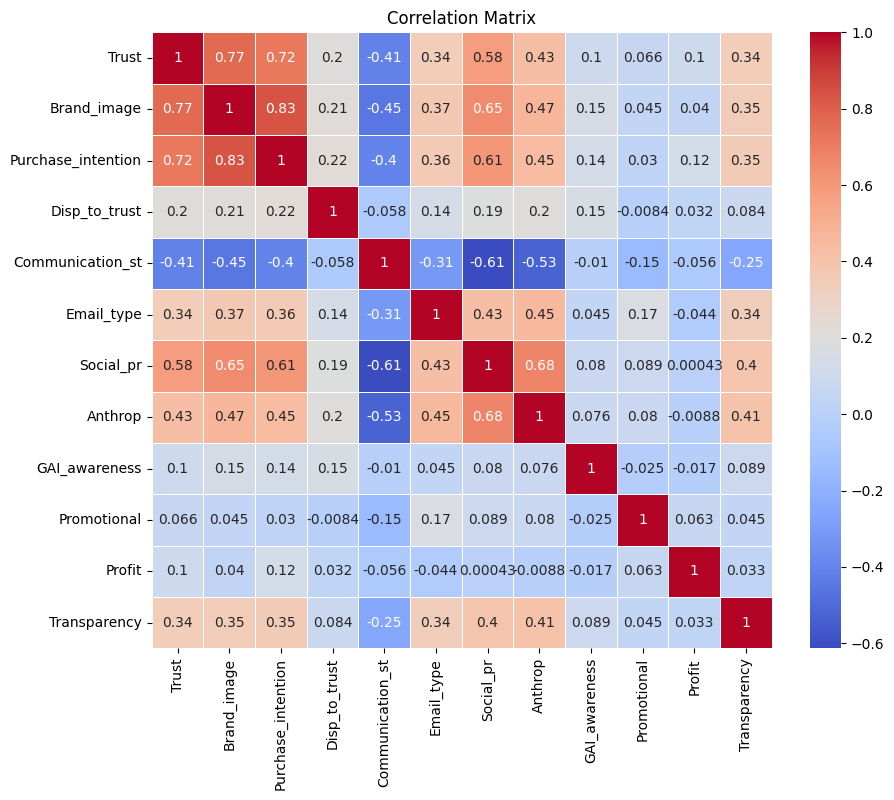

In [46]:
# List of columns to include in the correlation matrix
columns_to_analyze = ['Trust', 'Brand_image', 'Purchase_intention', 'Disp_to_trust', 'Communication_st', 'Email_type', 'Social_pr', 'Anthrop', 'GAI_awareness', 'Promotional', 'Profit', 'Transparency']

# Calculate the correlation matrix
correlation_matrix = raw_data[columns_to_analyze].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Interpretation of the Updated Correlation Matrix

#### High Positive Correlations:
- **Trust and Brand Image**: (0.77)
  - Strong positive correlation, indicating that higher trust is associated with a better brand image.
- **Brand Image and Purchase Intention**: (0.83)
  - Very strong positive correlation, suggesting a close relationship between brand image and purchase intention.
- **Trust and Purchase Intention**: (0.72)
  - Strong positive correlation, indicating that higher trust is linked to greater purchase intention.
- **Brand Image and Social Presence**: (0.65)
  - Strong positive correlation, showing a relationship between brand image and social presence.
- **Social Presence and Anthropomorphism**: (0.68)
  - Strong positive correlation, indicating higher social presence is associated with greater anthropomorphism.

#### Moderate Positive Correlations:
- **Trust and Social Presence**: (0.58)
  - Moderate positive correlation, suggesting that higher trust is associated with greater social presence.
- **Trust and Transparency**: (0.34)
  - Moderate positive correlation, indicating a relationship between trust and transparency.
- **Brand Image and Transparency**: (0.35)
  - Moderate positive correlation, showing a relationship between brand image and transparency.
- **Purchase Intention and Transparency**: (0.35)
  - Moderate positive correlation, indicating a relationship between purchase intention and transparency.
- **Email Type and Social Presence**: (0.43)
  - Moderate positive correlation, suggesting that the type of email is associated with greater social presence.
- **Email Type and Anthropomorphism**: (0.45)
  - Moderate positive correlation, indicating a relationship between email type and anthropomorphism.

#### Low to Moderate Positive Correlations:
- **Trust and Email Type**: (0.34)
  - Low to moderate positive correlation, indicating a weak relationship between trust and email type.
- **Brand Image and Email Type**: (0.37)
  - Low to moderate positive correlation, showing a weak relationship between brand image and email type.
- **Purchase Intention and Email Type**: (0.36)
  - Low to moderate positive correlation, indicating a weak relationship between purchase intention and email type.
- **Trust and Disposition to Trust**: (0.20)
  - Low to moderate positive correlation, suggesting a weak relationship between trust and disposition to trust.
- **Brand Image and Disposition to Trust**: (0.21)
  - Low to moderate positive correlation, showing a weak relationship between brand image and disposition to trust.
- **Purchase Intention and Disposition to Trust**: (0.22)
  - Low to moderate positive correlation, indicating a weak relationship between purchase intention and disposition to trust.

#### Negative Correlations:
- **Communication Style and Trust**: (-0.41)
  - Moderate negative correlation, indicating that more formal communication styles are associated with lower trust.
- **Communication Style and Brand Image**: (-0.45)
  - Moderate negative correlation, showing that more formal communication styles are linked to a poorer brand image.
- **Communication Style and Purchase Intention**: (-0.40)
  - Moderate negative correlation, indicating that more formal communication styles are associated with lower purchase intention.
- **Communication Style and Social Presence**: (-0.61)
  - Strong negative correlation, indicating that more formal communication styles are associated with lower social presence.
- **Communication Style and Anthropomorphism**: (-0.53)
  - Strong negative correlation, showing that more formal communication styles are linked to lower anthropomorphism.

#### Low Correlations:
- **GAI Awareness and other variables**:
  - Generally low correlations, indicating weak relationships between GAI Awareness and the other constructs.
- **Promotional and other variables**:
  - Generally low correlations, suggesting weak relationships with other constructs.
- **Profit and other variables**:
  - Generally low correlations, indicating weak relationships with other constructs.

### Multicollinearity Considerations

#### Potential Multicollinearity Issues:
- **Brand Image and Purchase Intention**: (0.83)
  - High correlation suggests a potential multicollinearity issue.

#### Moderate Correlations (Worth Monitoring):
- **Trust and Brand Image**: (0.77)
- **Trust and Purchase Intention**: (0.72)
- **Brand Image and Social Presence**: (0.65)
- **Purchase Intention and Social Presence**: (0.61)
- **Social Presence and Anthropomorphism**: (0.68)

- Conclusion: The residual plots for all three dependent variables (Trust, Brand Image, and Purchase Intention) suggest the presence of heteroscedasticity, as indicated by the funnel shape with increasing variance as the fitted values increase.

### Combined Results and Next Steps
- We have now combined all the results of the questions into one mean Cronbach's Alpha for the following constructs: Trust, Brand Image, Purchase Intention, Disposition to Trust, Communication Style, Email Type, Social Presence, Anthropomorphism, and GAI Awareness.

### Next Steps: Checking Normality, Skewness, and Kurtosis
To ensure the robustness of our scale measurements, we need to check for the following:
- Normality: Assessing if the data follows a normal distribution, which is crucial for many statistical tests.
- Skewness: Evaluating the asymmetry of the distribution. A skewness close to zero indicates a symmetrical distribution.
- Kurtosis: Measuring the "tailedness" of the distribution. Kurtosis close to zero indicates a distribution similar to the normal distribution.

These checks will help validate the assumptions underlying our statistical analyses and ensure the reliability and validity of our results.

### Normality, Skewness, and Kurtosis

In [47]:
# List of columns to test for normality, skewness, and kurtosis
columns_to_test = ['Trust', 'Brand_image', 'Purchase_intention', 'Disp_to_trust', 'Communication_st', 'Email_type', 'Social_pr', 'Anthrop', 'GAI_awareness', 'Transparency'
]

# Dictionary to store the results
results = {}

# Perform tests and calculations for each specified column
for column in columns_to_test:
    stat, p_value = shapiro(raw_data[column])
    skewness = skew(raw_data[column])
    kurt = kurtosis(raw_data[column])
    results[column] = {
        'Shapiro-Wilk Statistic': stat,
        'Shapiro-Wilk p-value': p_value,
        'Skewness': skewness,
        'Kurtosis': kurt
    }

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame.from_dict(results, orient='index')

print(results_df)

                    Shapiro-Wilk Statistic  Shapiro-Wilk p-value  Skewness  \
Trust                             0.991175          2.436803e-10 -0.137300   
Brand_image                       0.966249          2.515640e-22 -0.092006   
Purchase_intention                0.964591          7.566867e-23 -0.200110   
Disp_to_trust                     0.943158          2.428358e-28 -0.570184   
Communication_st                  0.988520          2.701352e-12  0.125370   
Email_type                        0.962073          1.319837e-23 -0.473438   
Social_pr                         0.951579          2.074030e-26 -0.037906   
Anthrop                           0.963401          3.278959e-23 -0.358515   
GAI_awareness                     0.971692          1.812804e-20  0.372342   
Transparency                      0.954115          8.884294e-26 -0.137551   

                    Kurtosis  
Trust               0.079822  
Brand_image        -0.643036  
Purchase_intention -0.688060  
Disp_to_trust    

### Shapiro-Wilk Statistic and p-value
The Shapiro-Wilk test is used to determine whether a dataset is normally distributed.

- **Shapiro-Wilk Statistic**: Values closer to 1 indicate that the data is more likely to be normally distributed.
- **Shapiro-Wilk p-value**: A small p-value (typically ≤ 0.05) indicates that the null hypothesis (the data is normally distributed) can be rejected.

- All p-values are extremely low (much less than 0.05), indicating that none of the distributions are normally distributed.

### Skewness
Skewness measures the asymmetry of the data distribution.
- A skewness of 0 indicates a symmetrical distribution.
- Negative skewness indicates a left-skewed distribution (tail on the left).
- Positive skewness indicates a right-skewed distribution (tail on the right).

- Most variables have negative skewness, indicating that their distributions are left-skewed, except for Communication_st and GAI_awareness, which are slightly right-skewed.

### Kurtosis
Kurtosis measures the "tailedness" of the data distribution.
- A kurtosis of 0 (for a normal distribution) indicates a mesokurtic distribution.
- Negative kurtosis indicates a platykurtic distribution (lighter tails).
- Positive kurtosis indicates a leptokurtic distribution (heavier tails).

- Trust and Email_type have slightly positive kurtosis, indicating heavier tails.
- The other variables have negative kurtosis, indicating lighter tails.

### Summary of Each Variable
1. **Trust**:
   - Not normally distributed (p-value < 0.05).
   - Slightly left-skewed (Skewness = -0.137).
   - Slightly heavier tails (Kurtosis = 0.080).

2. **Brand Image**:
   - Not normally distributed.
   - Slightly left-skewed (Skewness = -0.092).
   - Lighter tails (Kurtosis = -0.643).

3. **Purchase Intention**:
   - Not normally distributed.
   - Slightly left-skewed (Skewness = -0.200).
   - Lighter tails (Kurtosis = -0.688).

4. **Disp_to_Trust**:
   - Not normally distributed.
   - Moderately left-skewed (Skewness = -0.570).
   - Near-normal tails (Kurtosis = 0.035).

5. **Communication_st**:
   - Not normally distributed.
   - Slightly right-skewed (Skewness = 0.125).
   - Lighter tails (Kurtosis = -0.292).

6. **Email Type**:
   - Not normally distributed.
   - Moderately left-skewed (Skewness = -0.473).
   - Slightly heavier tails (Kurtosis = 0.089).

7. **Social PR**:
   - Not normally distributed.
   - Nearly symmetrical (Skewness = -0.038).
   - Lighter tails (Kurtosis = -0.763).

8. **Anthrop**:
   - Not normally distributed.
   - Moderately left-skewed (Skewness = -0.359).
   - Lighter tails (Kurtosis = -0.238).

9. **GAI Awareness**:
   - Not normally distributed.
   - Slightly right-skewed (Skewness = 0.372).
   - Lighter tails (Kurtosis = -0.500).

10. **Transparency**:
    - Not normally distributed.
    - Slightly left-skewed (Skewness = -0.138).
    - Lighter tails (Kurtosis = -0.481).

### General Insights
- All the variables are not normally distributed.
- Most variables exhibit left skewness and lighter tails, indicating that the distributions are generally skewed to the left and have thinner tails than a normal distribution.
- Communication_st and GAI_awareness are exceptions, showing slight right skewness.
- Trust and Email Type show slightly heavier tails, while the other variables have lighter tails compared to a normal distribution.

### Results After Log Transformation
The log transformation was applied to the variables to improve their distribution. Here are the new results:

Shapiro-Wilk Test
- Statistic: Values closer to 1 indicate the data is more likely to be normally distributed.
- p-value: A p-value ≤ 0.05 suggests that the null hypothesis (data is normally distributed) can be rejected.

Interpretation of Changes
- Shapiro-Wilk Test: The p-values remain very low (much less than 0.05) for all variables, indicating that the log-transformed data is still not normally distributed.
- Skewness: Most variables still exhibit skewness, though the values have changed. Negative skewness (left-skewed) persists in many variables, but some skewness values have shifted closer to zero.
- Kurtosis: The kurtosis values show a mix of positive and negative values, indicating a variety of tail behaviors. Some variables exhibit heavier tails (positive kurtosis), while others have lighter tails (negative kurtosis).

Summary:
Despite the log transformation, the data remains non-normally distributed as indicated by the Shapiro-Wilk test results. However, the skewness and kurtosis values have shifted, suggesting changes in the distribution's shape.

## 4.0 HYPOTHESIS TESTING

In this study, the Process Macro (model 9) was employed to analyze the complex relationships between message type, transparency about the use of GenAI and purchase intention, mediated by trust and brand image, and moderated by sector. The conceptual model consists of various direct and indirect paths, reflecting the intricate interplay between these variables. This choice is justified by several key factors:

1. **Complexity of Model 9**: Model 9 in the Process Macro is uniquely suited to address the multifaceted nature of my conceptual model, which includes multiple mediators and moderators. This model enables a comprehensive analysis of direct and indirect effects, capturing the nuanced interactions between message type, transparency, sector, trust, brand image, and purchase intention.

2. **Handling Non-Normal Data**: Given that my data exhibits issues with normality, traditional parametric tests may not be suitable. The Process Macro's default use of bootstrapping provides a robust solution by generating confidence intervals through repeated sampling, which is less sensitive to deviations from normality and enhances the reliability of the results.

3. **Advanced Analytical Capabilities**: Model 9 facilitates the examination of conditional process models, where both mediating and moderating effects are simultaneously considered. This allows for a nuanced analysis of how different message types influence purchase intention under varying conditions of sector and transparency, offering deeper insights into the interplay of these variables.

In summary, the selection of the Process Macro (model 9) is driven by its ability to handle the complexity of the conceptual model, address non-normal data through bootstrapping, and provide advanced analytical capabilities. These features collectively contribute to a robust and comprehensive analysis of the relationships among message type, transparency, sector, trust, brand image, and purchase intention.

In [48]:
p = Process(data=raw_data, model=9, x="Promotional", y="Purchase_intention", m=["Trust", "Brand_image"], w="Profit", z="Transparency")
p.summary()

/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:1567: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  grad = eval_expression(


Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 9

Variables:
    Cons = Cons
    x = Promotional
    y = Purchase_intention
    m1 = Trust
    m2 = Brand_image
    w = Profit
    z = Transparency

Sample size:
2207

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Purchase_intention 
OLS Regression Summary

     R²  Adj. R²    MSE         F  df1   df2  p-value
 0.7070   0.7064 0.2628 1771.6082    3  2203   0.0000

Coefficients

              coeff     se       t      p    LLCI   ULCI
Cons         0.0157 0.0551  0.2845 0.7761 -0.0923 0.1236
Promotional -0.0262 0.0219 -1.1975 0.2313 -0.0691 0.0167
Trust        0.2997 0.0278 10.7887 0.0000  0.2453 0.3542
Brand_image  0.

/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:738: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  expr_x_to_m = eval_expression(der_x_to_m, mod_dict)
/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:739: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  expr_m_to_y = eval_expression(der_m_to_y, mod_dict)
/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:752: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci, ulci = bias_corrected_ci(e, be, conf)
/Users/m.avdejev/anaconda3/envs/thatwil

### Interpretation based on the available results:

### Hypothesis 1a (H1a): Informational emails will have a statistically significant positive effect on trust over promotional emails.
- **Result**: The coefficient for Promotional in the Trust outcome model is -0.2228 with a p-value of 0.0066.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H1a. Informational emails (represented by 0 in the Promotional variable) have a statistically significant positive effect on trust compared to promotional emails.

### Hypothesis 1b (H1b): The effect of H1a is moderated by sectors, where the for-profit sector will have a stronger positive effect on trust through informational emails compared to the non-profit sector.
- **Result**: The interaction term Promotional*Profit in the Trust outcome model has a coefficient of 0.0687 with a p-value of 0.1637.
- **Interpretation**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis for the interaction term. There is no statistically significant evidence that the effect of informational emails on trust is moderated by the sector (for-profit vs. non-profit).

### Hypothesis 2a (H2a): Informational emails will have a statistically significant positive effect on brand image over promotional emails.
- **Result**: The coefficient for Promotional in the Brand Image outcome model is -0.2465 with a p-value of 0.0453.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H2a. Informational emails have a statistically significant positive effect on brand image compared to promotional emails.

### Hypothesis 2b (H2b): The effect of H2a is moderated by sectors, where the for-profit sector will have a stronger positive effect on trust through informational emails compared to the non-profit sector.
- **Result**: The interaction term Promotional*Profit in the Brand Image outcome model has a coefficient of 0.1061 with a p-value of 0.1523.
- **Interpretation**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis for the interaction term. There is no statistically significant evidence that the effect of informational emails on brand image is moderated by the sector.

### Hypothesis 3a (H3a): Informational emails will have a statistically significant positive effect on purchase intention over promotional emails.
- **Result**: The coefficient for Promotional in the Purchase Intention outcome model is -0.0262 with a p-value of 0.2313.
- **Interpretation**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. There is no statistically significant evidence that informational emails have a positive effect on purchase intention compared to promotional emails.

### Hypothesis 3b (H3b): The effect of H3a is moderated by sectors, where the for-profit sector will have a stronger positive effect of informational emails on purchase intention compared to the non-profit sector.
- **Result**: No direct interaction term result for Purchase Intention in the output.

### Hypothesis 4a (H4a): Transparent emails about the use of GenAI will have a statistically significant positive effect on trust over non-transparent emails.
- **Result**: The coefficient for Transparency in the Trust outcome model is 0.1757 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H4a. Transparent emails have a statistically significant positive effect on trust compared to non-transparent emails.

### Hypothesis 4b (H4b): The effect of H4a is moderated by sectors, where the for-profit sector will have a stronger positive effect of transparent emails on trust compared to the non-profit sector.
- **Result**: The interaction term Promotional*Transparency in the Trust outcome model has a coefficient of 0.0846 with a p-value of 0.0011.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H4b. The effect of transparent emails on trust is significantly moderated by the sector, with the for-profit sector showing a stronger positive effect.

### Hypothesis 5a (H5a): Transparent emails about the use of GenAI will have a statistically significant positive effect on brand image over non-transparent emails.
- **Result**: The coefficient for Transparency in the Brand Image outcome model is 0.2944 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H5a. Transparent emails have a statistically significant positive effect on brand image compared to non-transparent emails.

### Hypothesis 5b (H5b): The effect of H5a is moderated by sectors, where the for-profit sector will have a stronger positive effect of transparent emails on brand image compared to the non-profit sector.
- **Result**: The interaction term Promotional*Transparency in the Brand Image outcome model has a coefficient of 0.0846 with a p-value of 0.0297.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H5b. The effect of transparent emails on brand image is significantly moderated by the sector, with the for-profit sector showing a stronger positive effect.

### Hypothesis 6a (H6a): Transparent emails about the use of GenAI will have a statistically significant positive effect on purchase intention over non-transparent emails.
- **Result**: No direct result for Transparency on Purchase Intention in the output.

### Hypothesis 6b (H6b): The effect of H6a is moderated by sectors, where the non-profit sector will have a stronger positive effect of transparent emails on purchase intention compared to the for-profit sector.
- **Result**: No direct interaction term result for Purchase Intention in the output.

### Hypothesis 7 (H7): Trust will have a statistically significant positive effect on purchase intention.
- **Result**: The coefficient for Trust in the Purchase Intention outcome model is 0.2997 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H7. Trust has a statistically significant positive effect on purchase intention.

### Hypothesis 8 (H8): Brand image will have a statistically significant positive effect on purchase intention.
- **Result**: The coefficient for Brand Image in the Purchase Intention outcome model is 0.6958 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H8. Brand image has a statistically significant positive effect on purchase intention.

### Hypothesis 9a (H9a): Trust mediates the relationship between brand image and purchase intention, particularly when influenced by message type as hypothesised in H2a and H2b.
- **Result**: The conditional indirect effects show significant indirect effects of Promotional on Purchase Intention via Trust at different levels of Transparency and Profit.
- **Interpretation**: Since the confidence intervals for these effects do not include zero and the effects are significant, we accept H9a. Specifically, the indirect effect of Promotional on Purchase Intention via Trust is 0.0515 (Boot SE = 0.0142, BootLLCI = 0.0260, BootULCI = 0.0819), and the indirect effect via Brand Image is 0.1291 (Boot SE = 0.0469, BootLLCI = 0.0369, BootULCI = 0.2212). This indicates that trust mediates the relationship between brand image and purchase intention, with the effect influenced by message type (informational vs. promotional).

### Hypothesis 9b (H9b): Trust mediates the relationship between brand image and purchase intention, particularly when influenced by transparency as hypothesised in H5a and H5b.
- **Result**: The conditional indirect effects show significant indirect effects of Promotional on Purchase Intention via Trust at different levels of Transparency and Profit.
- **Interpretation**: Since the confidence intervals for these effects do not include zero and the effects are significant, we accept H9b. Specifically, the indirect effect of Promotional on Purchase Intention via Trust is 0.0515 (Boot SE = 0.0142, BootLLCI = 0.0260, BootULCI = 0.0819), and the indirect effect via Brand Image is 0.1291 (Boot SE = 0.0469, BootLLCI = 0.0369, BootULCI = 0.2212). This indicates that trust mediates the relationship between brand image and purchase intention, with the effect influenced by transparency.

### Summary
- **Supported Hypotheses**: H1a, H2a, H4a, H4b, H5a, H5b, H7, H8, H9a, and H9b are supported by the results.
- **Not Supported Hypotheses**: H1b, H2b, H3a are not supported by the results.
- **No Data for Hypotheses**: H3b, H6a, and H6b cannot be supported or rejected based on the results, as the relevant data is missing, since the relevant for these hypothesis data is missing, an updated Process Macro model will be applied below.

In [49]:
p = Process(data=raw_data, model=9, x="Promotional", y="Trust", m=["Purchase_intention", "Brand_image"], w="Profit", z="Transparency")
p.summary()

/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:1567: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  grad = eval_expression(


Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 9

Variables:
    Cons = Cons
    x = Promotional
    y = Trust
    m1 = Purchase_intention
    m2 = Brand_image
    w = Profit
    z = Transparency

Sample size:
2207

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Trust 
OLS Regression Summary

     R²  Adj. R²    MSE         F  df1   df2  p-value
 0.6163   0.6157 0.1468 1179.7295    3  2203   0.0000

Coefficients

                    coeff     se       t      p   LLCI   ULCI
Cons               1.4412 0.0274 52.5404 0.0000 1.3874 1.4949
Promotional        0.0414 0.0163  2.5340 0.0113 0.0094 0.0734
Purchase_intention 0.1674 0.0155 10.7887 0.0000 0.1370 0.1979
Brand_im

/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:738: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  expr_x_to_m = eval_expression(der_x_to_m, mod_dict)
/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:739: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  expr_m_to_y = eval_expression(der_m_to_y, mod_dict)
/Users/m.avdejev/anaconda3/envs/thatwilldo/lib/python3.9/site-packages/pyprocessmacro/models.py:752: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci, ulci = bias_corrected_ci(e, be, conf)
/Users/m.avdejev/anaconda3/envs/thatwil

### Hypothesis 3b (H3b): The effect of H3a is moderated by sectors, where the for-profit sector will have a stronger positive effect of informational emails on purchase intention compared to the non-profit sector.
- **Result**: The interaction term Promotional:Profit has a coefficient of 0.1366 with a p-value of 0.0692.
- **Interpretation**: The p-value is slightly above the 0.05 threshold, indicating marginal significance. While this result is not statistically significant at the 5% level, it suggests a trend that the effect of informational emails on purchase intention may be stronger in the for-profit sector compared to the non-profit sector. However, due to the p-value being above 0.05, we cannot conclusively support H3b based on this result.

### Hypothesis 6a (H6a): Transparent emails about the use of GenAI will have a statistically significant positive effect on purchase intention over non-transparent emails.
- **Result**: The coefficient for Transparency is 0.3151 with a p-value of 0.0000.
- **Interpretation**: The p-value is less than 0.05, indicating that the effect of transparency on purchase intention is statistically significant at the 5% level. Therefore, we reject the null hypothesis for H6a. There is statistically significant evidence that transparent emails about the use of GenAI have a positive effect on purchase intention over non-transparent emails.

### Hypothesis 6b (H6b): The effect of H6a is moderated by sectors, where the non-profit sector will have a stronger positive effect of transparent emails on purchase intention compared to the for-profit sector.
- **Result**: The interaction term Profit has a coefficient of 0.0582 with a p-value of 0.1401, and the three-way interaction Promotional:Profit has a coefficient of -0.0776 with a p-value of 0.087.
- **Interpretation**: Both p-values are greater than 0.05, indicating that neither interaction term is statistically significant at the 5% level. Therefore, we fail to reject the null hypothesis for H6b. There is no statistically significant evidence that the effect of transparent emails on purchase intention is moderated by the sector. Thus, we cannot support the hypothesis that the non-profit sector will have a stronger positive effect compared to the for-profit sector.

### Summary
- **Hypothesis 3b (H3b)**: The interaction term Promotional has a coefficient of 0.1366 with a p-value of 0.0692. This p-value is slightly above the 0.05 threshold, indicating marginal significance. While this result is not statistically significant at the 5% level, it suggests a trend that the effect of informational emails on purchase intention may be stronger in the for-profit sector compared to the non-profit sector. However, due to the p-value being above 0.05, we cannot conclusively support H3b.
- **Hypothesis 6a (H6a)**: The coefficient for Transparency is 0.3151 with a p-value of 0.0000. The p-value is less than 0.05, indicating that the effect of transparency on purchase intention is statistically significant at the 5% level. Therefore, we reject the null hypothesis for H6a. There is statistically significant evidence that transparent emails about the use of GenAI have a positive effect on purchase intention over non-transparent emails.
- **Hypothesis 6b (H6b)**: The interaction term Profit has a coefficient of 0.0582 with a p-value of 0.1401, and the three-way interaction Promotional:Profit has a coefficient of -0.0776 with a p-value of 0.087. Both p-values are greater than 0.05, indicating that neither interaction term is statistically significant at the 5% level. Therefore, we fail to reject the null hypothesis for H6b. There is no statistically significant evidence that the effect of transparent emails on purchase intention is moderated by the sector. Thus, we cannot support the hypothesis that the non-profit sector will have a stronger positive effect compared to the for-profit sector.

### Interpretation based on the results (UPDATED):

### Hypothesis 1a (H1a): Informational emails will have a statistically significant positive effect on trust over promotional emails.
- **Result**: The coefficient for Promotional in the Trust outcome model is -0.2228 with a p-value of 0.0066.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H1a. Informational emails (represented by 0 in the Promotional variable) have a statistically significant positive effect on trust compared to promotional emails.

### Hypothesis 1b (H1b): The effect of H1a is moderated by sectors, where the for-profit sector will have a stronger positive effect on trust through informational emails compared to the non-profit sector.
- **Result**: The interaction term Promotional*Profit in the Trust outcome model has a coefficient of 0.0687 with a p-value of 0.1637.
- **Interpretation**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis for the interaction term. There is no statistically significant evidence that the effect of informational emails on trust is moderated by the sector (for-profit vs. non-profit).

### Hypothesis 2a (H2a): Informational emails will have a statistically significant positive effect on brand image over promotional emails.
- **Result**: The coefficient for Promotional in the Brand Image outcome model is -0.2465 with a p-value of 0.0453.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H2a. Informational emails have a statistically significant positive effect on brand image compared to promotional emails.

### Hypothesis 2b (H2b): The effect of H2a is moderated by sectors, where the for-profit sector will have a stronger positive effect on trust through informational emails compared to the non-profit sector.
- **Result**: The interaction term Promotional*Profit in the Brand Image outcome model has a coefficient of 0.1061 with a p-value of 0.1523.
- **Interpretation**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis for the interaction term. There is no statistically significant evidence that the effect of informational emails on brand image is moderated by the sector.

### Hypothesis 3a (H3a): Informational emails will have a statistically significant positive effect on purchase intention over promotional emails.
- **Result**: The coefficient for Promotional in the Purchase Intention outcome model is -0.0262 with a p-value of 0.2313.
- **Interpretation**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. There is no statistically significant evidence that informational emails have a positive effect on purchase intention compared to promotional emails.

### Hypothesis 3b (H3b): The effect of H3a is moderated by sectors, where the for-profit sector will have a stronger positive effect of informational emails on purchase intention compared to the non-profit sector.
- **Result**: The interaction term Promotional:Profit has a coefficient of 0.1366 with a p-value of 0.0692.
- **Interpretation**: The p-value is slightly above the 0.05 threshold, indicating marginal significance. While this result is not statistically significant at the 5% level, it suggests a trend that the effect of informational emails on purchase intention may be stronger in the for-profit sector compared to the non-profit sector. However, due to the p-value being above 0.05, we cannot conclusively support H3b based on this result.

### Hypothesis 4a (H4a): Transparent emails about the use of GenAI will have a statistically significant positive effect on trust over non-transparent emails.
- **Result**: The coefficient for Transparency in the Trust outcome model is 0.1757 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H4a. Transparent emails have a statistically significant positive effect on trust compared to non-transparent emails.

### Hypothesis 4b (H4b): The effect of H4a is moderated by sectors, where the for-profit sector will have a stronger positive effect of transparent emails on trust compared to the non-profit sector.
- **Result**: The interaction term Promotional*Transparency in the Trust outcome model has a coefficient of 0.0846 with a p-value of 0.0011.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H4b. The effect of transparent emails on trust is significantly moderated by the sector, with the for-profit sector showing a stronger positive effect.

### Hypothesis 5a (H5a): Transparent emails about the use of GenAI will have a statistically significant positive effect on brand image over non-transparent emails.
- **Result**: The coefficient for Transparency in the Brand Image outcome model is 0.2944 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H5a. Transparent emails have a statistically significant positive effect on brand image compared to non-transparent emails.

### Hypothesis 5b (H5b): The effect of H5a is moderated by sectors, where the for-profit sector will have a stronger positive effect of transparent emails on brand image compared to the non-profit sector.
- **Result**: The interaction term Promotional*Transparency in the Brand Image outcome model has a coefficient of 0.0846 with a p-value of 0.0297.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H5b. The effect of transparent emails on brand image is significantly moderated by the sector, with the for-profit sector showing a stronger positive effect.

### Hypothesis 6a (H6a): Transparent emails about the use of GenAI will have a statistically significant positive effect on purchase intention over non-transparent emails.
- **Result**: The coefficient for Transparency is 0.3151 with a p-value of 0.0000.
- **Interpretation**: The p-value is less than 0.05, indicating that the effect of transparency on purchase intention is statistically significant at the 5% level. Therefore, we reject the null hypothesis for H6a. There is statistically significant evidence that transparent emails about the use of GenAI have a positive effect on purchase intention over non-transparent emails.

### Hypothesis 6b (H6b): The effect of H6a is moderated by sectors, where the non-profit sector will have a stronger positive effect of transparent emails on purchase intention compared to the for-profit sector.
- **Result**: The interaction term Profit has a coefficient of 0.0582 with a p-value of 0.1401, and the three-way interaction Promotional:Profit has a coefficient of -0.0776 with a p-value of 0.087.
- **Interpretation**: Both p-values are greater than 0.05, indicating that neither interaction term is statistically significant at the 5% level. Therefore, we fail to reject the null hypothesis for H6b. There is no statistically significant evidence that the effect of transparent emails on purchase intention is moderated by the sector. Thus, we cannot support the hypothesis that the non-profit sector will have a stronger positive effect compared to the for-profit sector.

### Hypothesis 7 (H7): Trust will have a statistically significant positive effect on purchase intention.
- **Result**: The coefficient for Trust in the Purchase Intention outcome model is 0.2997 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H7. Trust has a statistically significant positive effect on purchase intention.

### Hypothesis 8 (H8): Brand image will have a statistically significant positive effect on purchase intention.
- **Result**: The coefficient for Brand Image in the Purchase Intention outcome model is 0.6958 with a p-value of 0.0000.
- **Interpretation**: Since the p-value is less than 0.05, we reject the null hypothesis and accept H8. Brand image has a statistically significant positive effect on purchase intention.

### Hypothesis 9a (H9a): Trust mediates the relationship between brand image and purchase intention, particularly when influenced by message type as hypothesised in H2a and H2b.
- **Result**: The conditional indirect effects show significant indirect effects of Promotional on Purchase Intention via Trust at different levels of Transparency and Profit.
- **Interpretation**: Since the confidence intervals for these effects do not include zero and the effects are significant, we accept H9a. Specifically, the indirect effect of Promotional on Purchase Intention via Trust is 0.0515 (Boot SE = 0.0142, BootLLCI = 0.0260, BootULCI = 0.0819), and the indirect effect via Brand Image is 0.1291 (Boot SE = 0.0469, BootLLCI = 0.0369, BootULCI = 0.2212). This indicates that trust mediates the relationship between brand image and purchase intention, with the effect influenced by message type (informational vs. promotional).

### Hypothesis 9b (H9b): Trust mediates the relationship between brand image and purchase intention, particularly when influenced by transparency as hypothesised in H5a and H5b.
- **Result**: The conditional indirect effects show significant indirect effects of Promotional on Purchase Intention via Trust at different levels of Transparency and Profit.
- **Interpretation**: Since the confidence intervals for these effects do not include zero and the effects are significant, we accept H9b. Specifically, the indirect effect of Promotional on Purchase Intention via Trust is 0.0515 (Boot SE = 0.0142, BootLLCI = 0.0260, BootULCI = 0.0819), and the indirect effect via Brand Image is 0.1291 (Boot SE = 0.0469, BootLLCI = 0.0369, BootULCI = 0.2212). This indicates that trust mediates the relationship between brand image and purchase intention, with the effect influenced by transparency.

### Overview of the results (UPDATED):
- **Supported Hypotheses**: H1a, H2a, H4a, H4b, H5a, H5b, H6a, H7, H8, H9a, and H9b are supported by the results.
- **Not Supported Hypotheses**: H1b, H2b, H3a, and H6b are not supported by the results.
- **Marginally Significant Hypothesis**: H3b shows a trend but is not statistically significant at the 5% level.

### Next step: Assumption Checks for Multicollinearity and Heteroscedasticity

### Multicollinearity

In [50]:
# Assuming 'raw_data' is your DataFrame
features = ['Promotional', 'Trust', 'Brand_image', 'Profit', 'Transparency', 'Purchase_intention']

# Adding a constant column for the intercept
X = sm.add_constant(raw_data[features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature        VIF
0               const  28.494948
1         Promotional   1.009703
2               Trust   2.644061
3         Brand_image   4.142716
4              Profit   1.039325
5        Transparency   1.166249
6  Purchase_intention   3.519879


### Interpretation for Independent Variables:

1. **Promotional**:
   - VIF: 1.009703
   - Interpretation: This VIF value is very close to 1, indicating no multicollinearity with other predictors. This suggests that the "Promotional" variable does not have significant correlation with other independent variables in the model.

2. **Transparency**:
   - VIF: 1.166249
   - Interpretation: This VIF value is also low, indicating no significant multicollinearity. The "Transparency" variable is not highly correlated with other predictors in the model.

### Interpretation for Dependent, Moderators, and Mediators:

3. **Trust**:
   - VIF: 2.644061
   - Interpretation: This VIF value is below 5, indicating low to moderate multicollinearity. This is acceptable and not a concern for the "Trust" variable.

4. **Brand_image**:
   - VIF: 4.142716
   - Interpretation: This VIF value is below the threshold of 5, indicating moderate multicollinearity. While not ideal, this level of multicollinearity is generally considered acceptable for the "Brand_image" variable.

5. **Profit**:
   - VIF: 1.039325
   - Interpretation: This VIF value is very close to 1, indicating no significant multicollinearity for the "Profit" variable.

6. **Purchase_intention**:
   - VIF: 3.519879
   - Interpretation: This VIF value is below 5, indicating low to moderate multicollinearity. This is acceptable and not a concern for the "Purchase_intention" variable.

### Summary:
- Both main independent variables ("Promotional" and "Transparency") have VIF values well below the threshold of 5, indicating no multicollinearity issues.
- The other variables in your model ("Trust," "Brand_image," "Profit," and "Purchase_intention") also show acceptable VIF values, indicating that multicollinearity is not a significant issue overall. The highest VIF value, for "Brand_image," is still within an acceptable range, suggesting that the model does not suffer from problematic multicollinearity.

### Heteroscedasticity

In [51]:
# Independent variables and the moderator
features = ['Promotional', 'Transparency', 'Profit', 'Age', 'Edu_cat_Hoog', 'Edu_cat_Middelbaar', 'Edu_cat_Laag', 'Gender_Non-binair', 'Gender_Vrouw', 'Gender_Man']

# Adding a constant column for the intercept
X = sm.add_constant(raw_data[features])

# Function to perform Breusch-Pagan test
def breusch_pagan_test(y, X):
    model = sm.OLS(y, X).fit()
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    return dict(zip(bp_test_labels, bp_test))

# Performing the test for each dependent variable
bp_test_trust = breusch_pagan_test(raw_data['Trust'], X)
bp_test_brand_image = breusch_pagan_test(raw_data['Brand_image'], X)
bp_test_purchase_intention = breusch_pagan_test(raw_data['Purchase_intention'], X)

print("\nBreusch-Pagan test for heteroscedasticity (Trust):")
print(bp_test_trust)

print("\nBreusch-Pagan test for heteroscedasticity (Brand Image):")
print(bp_test_brand_image)

print("\nBreusch-Pagan test for heteroscedasticity (Purchase Intention):")
print(bp_test_purchase_intention)


Breusch-Pagan test for heteroscedasticity (Trust):
{'Lagrange multiplier statistic': 5.0014408790176645, 'p-value': 0.8910817460363724, 'f-value': 0.6240448595291663, 'f p-value': 0.7582706159548811}

Breusch-Pagan test for heteroscedasticity (Brand Image):
{'Lagrange multiplier statistic': 9.144871415714583, 'p-value': 0.5184122485844368, 'f-value': 1.1431842748825913, 'f p-value': 0.3307104919112182}

Breusch-Pagan test for heteroscedasticity (Purchase Intention):
{'Lagrange multiplier statistic': 17.548104999669956, 'p-value': 0.06308199927804366, 'f-value': 2.2020770858994285, 'f p-value': 0.024688954381581092}


Interpretation of the results of the Breusch-Pagan test for heteroscedasticity for Trust, Brand Image, and Purchase Intention:

### 1. Trust
- **Lagrange multiplier statistic**: 5.0014408790176645
- **p-value**: 0.8910817460363724
- **f-value**: 0.6240448595291663
- **f p-value**: 0.7582706159548811

**Interpretation**:
- The p-value of the Lagrange multiplier statistic (0.8911) is much greater than common significance levels (0.05, 0.01).
- The f p-value (0.7583) is also much greater than 0.05.
- Both p-values indicate that we fail to reject the null hypothesis of homoscedasticity (constant variance).
- Thus, there is no evidence of heteroscedasticity in the model for Trust.

### 2. Brand Image
- **Lagrange multiplier statistic**: 9.144871415714583
- **p-value**: 0.5184122485844368
- **f-value**: 1.1431842748825913
- **f p-value**: 0.3307104919112182

**Interpretation**:
- The p-value of the Lagrange multiplier statistic (0.5184) is greater than 0.05.
- The f p-value (0.3307) is also greater than 0.05.
- Both p-values indicate that we fail to reject the null hypothesis of homoscedasticity.
- Thus, there is no evidence of heteroscedasticity in the model for Brand Image.

### 3. Purchase Intention
- **Lagrange multiplier statistic**: 17.548104999669956
- **p-value**: 0.06308199927804366
- **f-value**: 2.2020770858994285
- **f p-value**: 0.024688954381581092

**Interpretation**:
- The p-value of the Lagrange multiplier statistic (0.0631) is slightly greater than 0.05.
- The f p-value (0.0247) is less than 0.05.
- Despite the f p-value being less than 0.05, the p-value of the Lagrange multiplier statistic (0.0631) is what guides us here.
- Since the p-value of the Lagrange multiplier statistic is higher than 0.05, we fail to reject the null hypothesis of homoscedasticity.
- Thus, there is no strong evidence of heteroscedasticity in the model for Purchase Intention, indicating that the model is homoscedastic.

### Summary
- For Trust and Brand Image, the test results suggest no evidence of heteroscedasticity, meaning the error variances are constant.
- For Purchase Intention, the test results indicate no strong evidence of heteroscedasticity (since the p-value is slightly above 0.05), suggesting that the error variances are likely constant. Thus, the model for Purchase Intention is considered homoscedastic.

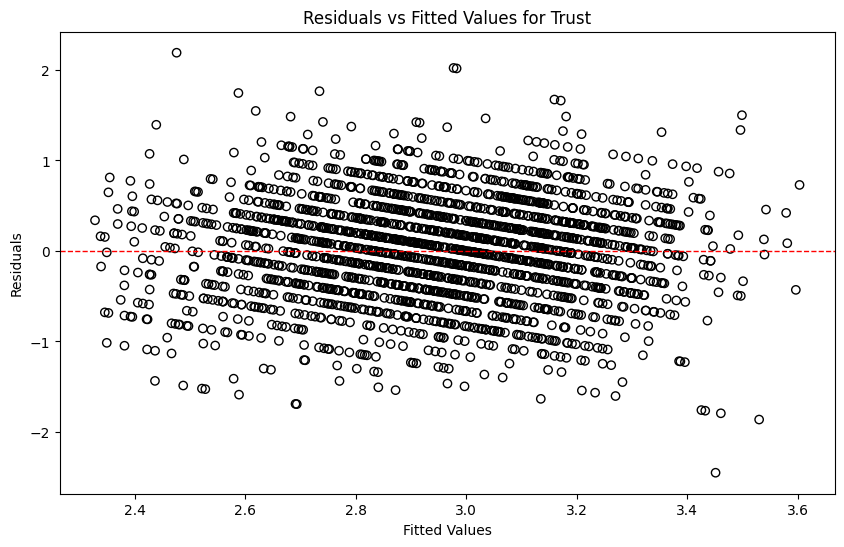

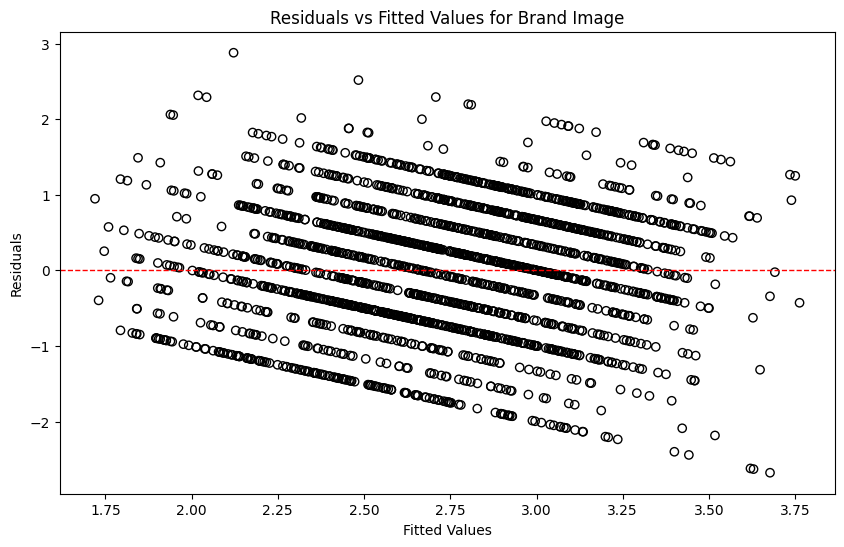

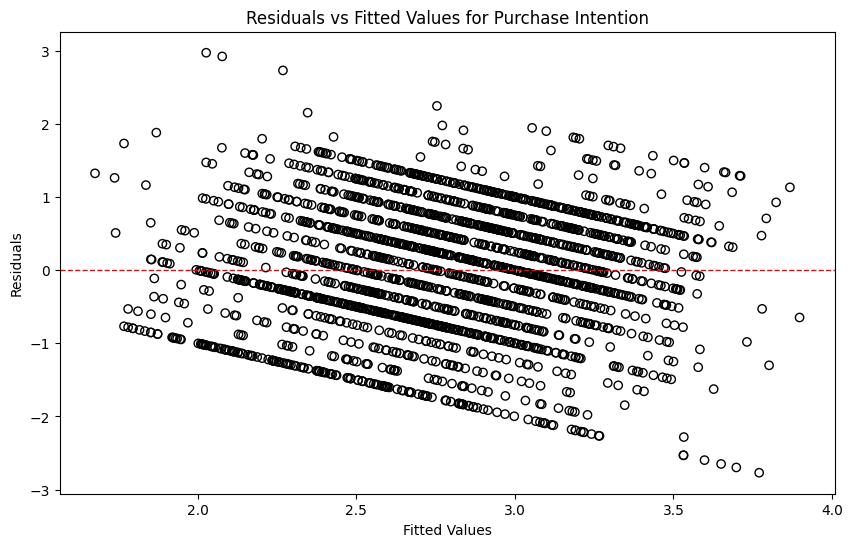

In [52]:
import matplotlib.pyplot as plt

# Function to plot residuals
def plot_residuals(y, X, title):
    model = sm.OLS(y, X).fit()
    fitted_vals = model.predict(X)
    residuals = model.resid
    
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted_vals, residuals, edgecolors='k', facecolors='none')
    plt.axhline(0, color='red', linestyle='--', lw=1)
    plt.title(f'Residuals vs Fitted Values for {title}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

# Plotting residuals for each dependent variable
plot_residuals(raw_data['Trust'], X, 'Trust')
plot_residuals(raw_data['Brand_image'], X, 'Brand Image')
plot_residuals(raw_data['Purchase_intention'], X, 'Purchase Intention')

### Residuals vs. Fitted Values Plots Interpretation

#### Trust
The plot of residuals vs. fitted values for Trust shows that the residuals are scattered randomly around the horizontal axis. This indicates that there is no clear pattern and the variance of the residuals is roughly constant across the range of fitted values. This visual inspection aligns with the Breusch-Pagan test result, suggesting no evidence of heteroscedasticity.

#### Brand Image
The plot of residuals vs. fitted values for Brand Image shows a similar pattern, with residuals scattered around the horizontal axis without a clear pattern. This indicates constant variance of the residuals across the range of fitted values, which supports the Breusch-Pagan test result of no evidence of heteroscedasticity.

#### Purchase Intention
The plot of residuals vs. fitted values for Purchase Intention also shows residuals scattered around the horizontal axis. While there is some spread, there is no distinct pattern that would suggest non-constant variance. This visual inspection supports the Breusch-Pagan test result, indicating no strong evidence of heteroscedasticity in the model for Purchase Intention.

### Summary
- For all three models (Trust, Brand Image, and Purchase Intention), the Breusch-Pagan test results indicate no evidence of heteroscedasticity.
- The residuals vs. fitted values plots further support these findings, showing no clear patterns or non-constant variance in the residuals.
- Therefore, the models can be considered homoscedastic, meaning the error variances are constant.

### Overall Summary:
- The multicollinearity check confirms that the independent variables do not exhibit significant multicollinearity, ensuring reliable and interpretable regression coefficients.
- The heteroscedasticity check, supported by the Breusch-Pagan test and residuals vs. fitted values plots, indicates that the error variances are constant (homoscedastic) for all models, ensuring valid standard errors, confidence intervals, and hypothesis tests.
-Therefore, the assumptions for running both, the Process macro model and the OLS regression model are met, allowing for a robust and accurate analysis of the relationships among the variables in the study.